## Contexto y Objetivos

 

- El Ingenio La Providencia cuenta con un conjunto de datos históricos que recoge información relevante sobre la producción de caña de azúcar. Este taller tiene como objetivo que ustedes, como estudiantes, apliquen los conocimientos adquiridos en el curso para desarrollar modelos que permitan desarrollar las siguientes tareas:

 

### Regresión (HISTORICO_SUERTES.xlsx): Predecir dos variables clave:

- Toneladas de caña por hectárea (TCH): Indicador de la productividad de la tierra.
- Porcentaje de sacarosa (%Sac.Caña): Medida de la calidad de la caña y la cantidad de azúcar extraíble.


## Instrucciones Generales

 ### Parte 1: Modelo de Regresión

 ### Análisis Exploratorio de Datos (EDA):

- Realizar una exploración inicial del conjunto de datos: identificar variables relevantes, detectar valores faltantes y posibles outliers.
- Visualizar la distribución de las variables de interés (TCH y %Sac.Caña).

### Desarrollo de Modelos:

- Ajustar modelos de regresión lineal para predecir TCH y %Sac.Caña.
- Analizar la significancia de las variables, interpretar los coeficientes y evaluar los supuestos del modelo (linealidad, homocedasticidad, normalidad de errores, etc.).
- Diagnosticar posibles problemas como la multicolinealidad o la presencia de observaciones atípicas, y proponer soluciones (por ejemplo, técnicas de regularización).
 
### Validación y Evaluación:

- Utilizar estrategias de validación (holdout y/o validación cruzada) para evaluar el desempeño del modelo.
- Calcular al menos dos métricas de evaluación apropiadas (por ejemplo, R², RMSE, MAE) y discutir los resultados.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Configuración de visualización de gráficos
sns.set_theme(style="whitegrid", palette="pastel")

# Cargar el dataset
file_path = 'HISTORICO_SUERTES.xlsx'
df = pd.read_excel(file_path)

# Mostrar las primeras filas del dataset
df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Describimos las columnas para anlizar cantidad de datos y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

- Se observan 4 columnas de fecha, 67 columnas numericas y 14 objects, podemos ademas ver que el total maximo de filas es 21027 sin embargo para una de nuestras variables objetivo ( %Sac.Caña) la cantidad es menor (20578) y hay variables con un % bajo de datos sobre el total de filas 

#### vamos a identificar que columnas tienen poca cantidad de datos con respecto a nuestras variables objetivos
- con esto podemos analizar si las variables pueden ser relevantes o no 

In [3]:
#Describimos las columnas para anlizar cantidad de datos y tipos de datos
df.describe()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,F.Siembra,Ult.Riego,Edad Ult Cos,F.Ult.Corte,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
count,21027.000000,21027.000000,21026.000000,21027.000000,21022.000000,21027.000000,21027,8470,21027.00000,21027,...,4530.000000,4530.000000,4530.000000,0.0,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000
mean,202039.708708,80679.334427,46.448730,8.642948,25.311806,4.261806,2015-03-11 18:18:44.839492096,2020-02-16 21:24:26.351829760,13.01111,2020-10-27 09:01:09.339420672,...,80.764679,16.059757,24.556072,NaN,435.119397,438.344500,298.258587,1209.462980,442.941369,1912.479868
min,201701.000000,80100.000000,11.000000,0.004000,1.100000,0.000000,1986-04-30 00:00:00,2016-01-12 00:00:00,1.31000,2017-01-02 00:00:00,...,63.327000,12.500000,22.353000,NaN,352.013000,367.315000,23.100000,23.100000,190.400000,190.400000
25%,201812.000000,80247.000000,31.000000,3.310000,12.000000,1.000000,2013-03-13 00:00:00,2018-03-07 00:00:00,11.93000,2018-12-14 00:00:00,...,80.038000,15.200000,22.946250,NaN,421.344750,426.533250,221.650000,998.900000,416.800000,1729.900000
50%,202010.000000,80453.000000,51.000000,7.000000,21.900000,3.000000,2015-11-10 00:00:00,2019-08-14 00:00:00,12.62000,2020-10-11 00:00:00,...,81.291500,15.700000,23.201500,NaN,436.591000,439.140000,296.900000,1181.150000,440.950000,1885.200000
75%,202209.000000,81104.000000,51.000000,12.075000,32.700000,6.000000,2018-08-07 00:00:00,2022-05-19 00:00:00,13.86000,2022-09-25 00:00:00,...,82.440500,16.800000,25.660000,NaN,449.274000,450.391000,373.300000,1391.850000,465.800000,2057.800000
max,202407.000000,82557.000000,91.000000,65.000000,155.000000,31.000000,2023-09-08 00:00:00,2024-06-27 00:00:00,78.19000,2024-07-10 00:00:00,...,84.816000,19.700000,32.358000,NaN,500.212000,485.672000,618.000000,3783.700000,614.300000,4971.800000
std,216.642895,590.030150,21.513498,7.049533,18.237344,4.111935,NaN,NaN,1.97907,NaN,...,2.752029,1.300131,2.471964,NaN,21.307392,18.582606,102.901635,340.463189,43.680452,307.978328


In [4]:
# Calcular el umbral del 50% del total de datos
threshold = len(df) * 0.5

# Identificar las columnas con cantidad de datos no nulos inferior al umbral
columns_below_threshold = df.columns[df.isnull().sum() < threshold]

# Filtrar las columnas que tienen menos del 50% de datos no nulos
columns_below_threshold = df.columns[df.isnull().sum() > threshold]

# Mostrar las columnas identificadas
print(columns_below_threshold)

Index(['D.S.', 'Ult.Riego', 'Edad.Precosecha', 'Num.Riegos', '%Infest.Diatrea',
       'Fert.Nitrogen.', 'Urea 46%', 'MEZ', 'Boro Granul.', 'MicroZinc',
       'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S', 'Vinaza', 'Codigo Estacion',
       'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo',
       'Sum Oscilacion Temp Ciclo', 'Radicion Solar 0-3',
       'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo',
       'Evaporacion 0-3', 'Evaporacion Ciclo'],
      dtype='object')


In [5]:
# Identificar las columnas de tipo object
categorical_columns = df.select_dtypes(include=['object']).columns

# Mostrar las columnas categóricas
print(categorical_columns)

# Contar valores únicos en cada columna categórica
unique_counts = df[categorical_columns].nunique()

# Mostrar los conteos de valores únicos
print(unique_counts)

Index(['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.',
       'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó',
       'Codigo Estacion'],
      dtype='object')
Nombre              914
Zona                  7
Suerte             1220
Suelo               102
Variedad             58
Cod.Estado           32
D.S.                  3
Cultivo               2
Producto             18
Tipo Quema            5
T.Corte               4
Cerca de             31
Cosechó              14
Codigo Estacion      20
dtype: int64


In [6]:
# Filtrar las columnas categóricas con menos de 10 valores únicos
categorical_columns_less_than_20 = unique_counts[unique_counts < 20].index

# Mostrar los valores únicos de estas columnas
for column in categorical_columns_less_than_20:
    print(f"Valores únicos en la columna '{column}':")
    print(df[column].unique())
    print()

Valores únicos en la columna 'Zona':
['IP02' 'IP05' 'IP06' 'IP03' 'IP01' 'ip05' 'IC07']

Valores únicos en la columna 'D.S.':
[nan '1.65' 'DS' '1.5']

Valores únicos en la columna 'Cultivo':
['Normal' 'Organico' nan]

Valores únicos en la columna 'Producto':
['BONUS 250 EC REGULADOR FISIOLÓGICO' nan 'AGROFOSK-M' 'FUSILADE 2000 BL'
 'OTROS MADURANTES' 'PRODUCTO ENSAYO EN LITROS'
 'ROUND-UP MONSANTO 747 GRANULADO' 'FERTILIZANTE LIQUIDO RENDIMIENTO'
 'GREEN LIFE' 'MADURANTE REGULADOR TRONNUSPAC 250 EC' 'COADYUVANTE  DOUCE'
 'MADURANTE BIO SAFE ORGANIC' 'AMINA 2-4-D' 'baykal'
 'HERBICIDA CLICK 40 SC' 'GLIFOLAQ' 'BONUS 250 EC REGULADOR FISIOLOGICO'
 'TRANSLOK' 'FERTILIZANTE ORGÁNICO PATER-M']

Valores únicos en la columna 'Tipo Quema':
['VERDE' 'Q.ACCIDENTAL' 'Q.PROGRAMADA' 'SEMILLA' 'NO DEF.']

Valores únicos en la columna 'T.Corte':
['MECANIZADO' 'MANUAL' 'NO DEF.' 'SEMILLA']

Valores únicos en la columna 'Cosechó':
['AI08' '2000' 'AI01' '0004' '2200' '0001' 'ai08' 'aI08' '0003' '0005'
 '

In [7]:
# Contar registros por cada valor en las columnas categóricas con menos de 10 valores únicos
for column in categorical_columns_less_than_20:
    print(f"Conteo de registros por valor en la columna '{column}':")
    print(df[column].value_counts())
    print()

Conteo de registros por valor en la columna 'Zona':
Zona
IP05    7813
IP03    5184
IP06    4113
IP01    2307
IP02    1595
ip05      14
IC07       1
Name: count, dtype: int64

Conteo de registros por valor en la columna 'D.S.':
D.S.
1.65    7148
DS        19
1.5        1
Name: count, dtype: int64

Conteo de registros por valor en la columna 'Cultivo':
Cultivo
Normal      20266
Organico      759
Name: count, dtype: int64

Conteo de registros por valor en la columna 'Producto':
Producto
BONUS 250 EC REGULADOR FISIOLÓGICO       7001
BONUS 250 EC REGULADOR FISIOLOGICO       3380
COADYUVANTE  DOUCE                        380
FERTILIZANTE LIQUIDO RENDIMIENTO          179
FUSILADE 2000 BL                           84
AGROFOSK-M                                 54
MADURANTE REGULADOR TRONNUSPAC 250 EC      36
FERTILIZANTE ORGÁNICO PATER-M              31
ROUND-UP MONSANTO 747 GRANULADO            29
baykal                                     22
PRODUCTO ENSAYO EN LITROS                  18
MADUR

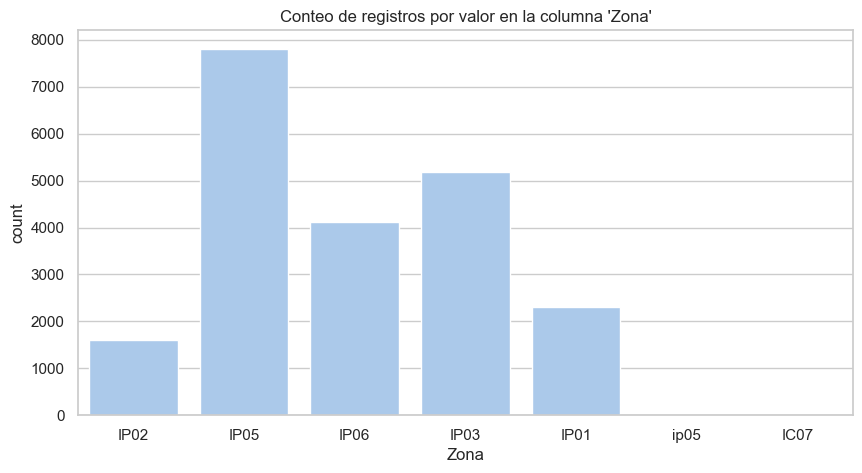

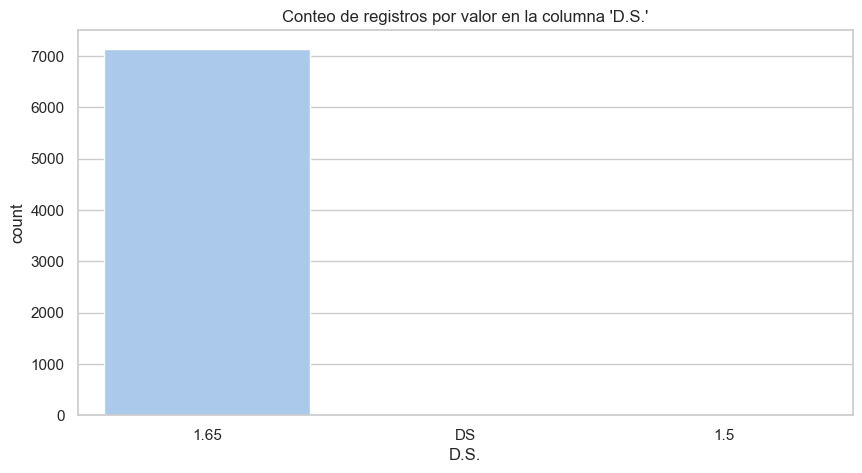

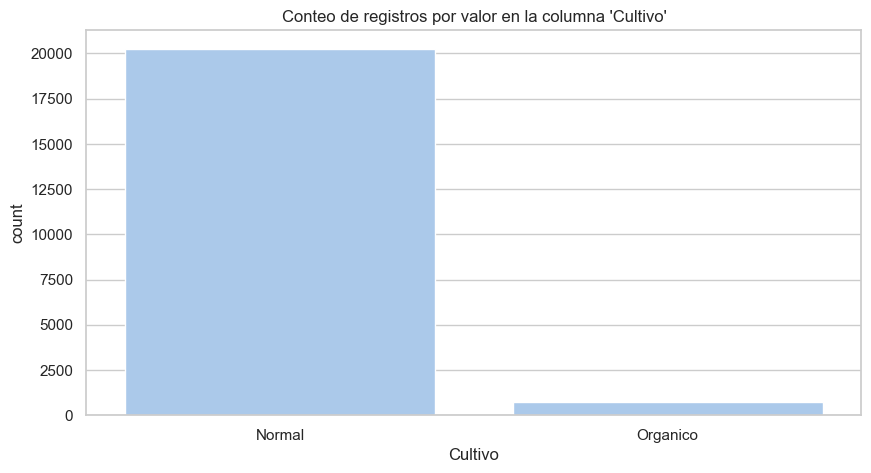

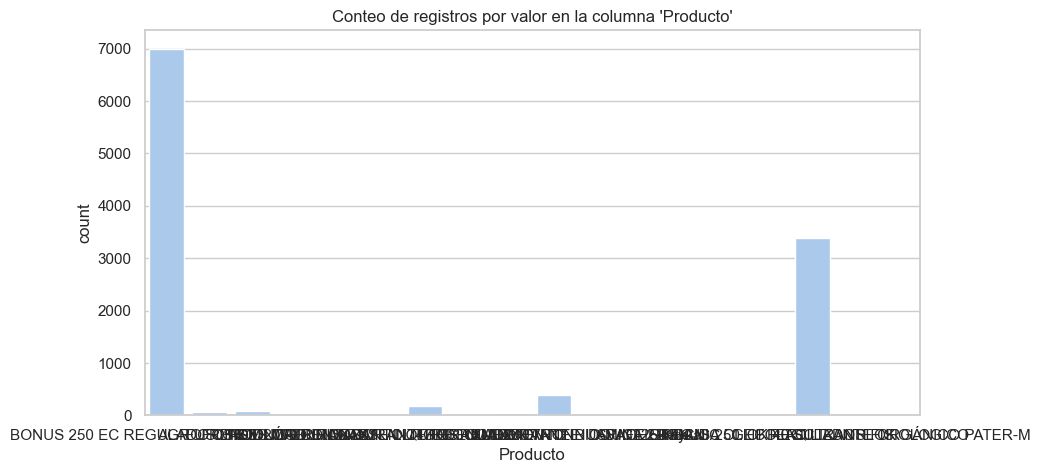

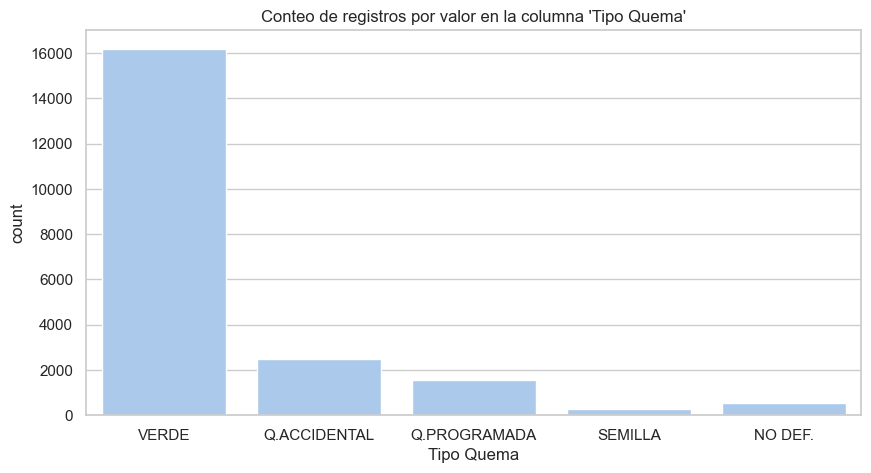

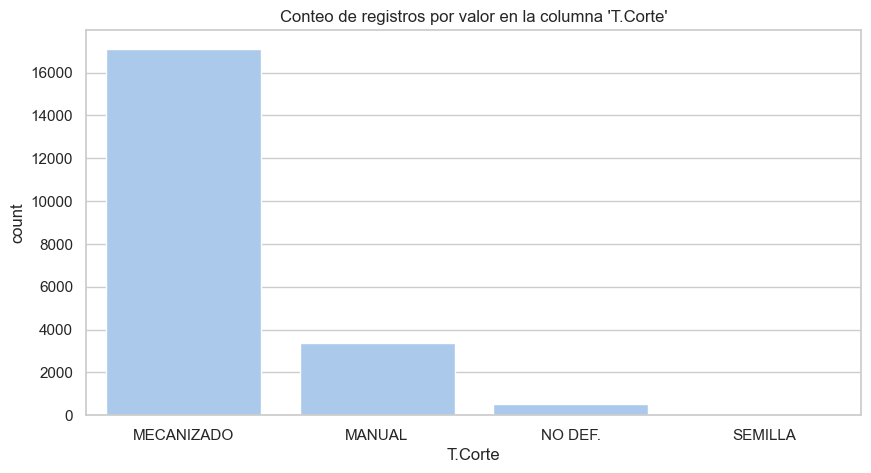

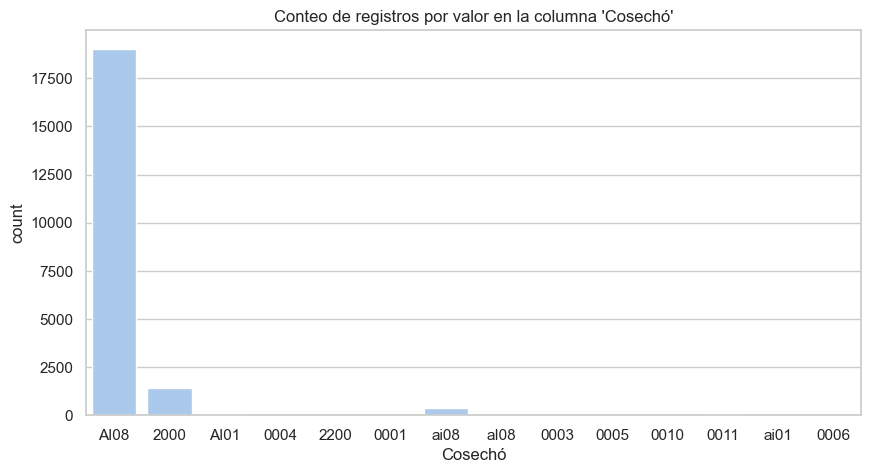

In [8]:
#Graficamos la cantidad de registros por cada valor en las columnas categóricas con menos de 10 valores únicos
for column in categorical_columns_less_than_20:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(f"Conteo de registros por valor en la columna '{column}'")
    plt.show()

- Al hacer esa exploracion de datos podemos observar que hay variables categoricas que No aportan mucho al estudio debido a que su un alto % esta asociado a una misma categoria, por lo aportan sesgo a los datos debido a que no estan balanceadas en sus diferentes valores

In [9]:
# Contar valores nulos en cada columna
null_counts = df.isnull().sum()
print(null_counts)


Período                      0
Hacienda                     0
Nombre                       0
Zona                         0
Tenencia                     1
                         ...  
Radiacion Solar Ciclo    16497
Precipitacion 0_3        16497
Precipitacion Ciclo      16497
Evaporacion 0-3          16497
Evaporacion Ciclo        16497
Length: 85, dtype: int64


In [10]:
#Revisamos datos duplicados
duplicates = df.duplicated()
print(duplicates.sum())


0


- al revisar valores nulos encontramos que existen columnas con un gran % de valores nulos con respecto a la cantidad de datos de la la variable objetivo, esto nos lleva a plantearnos la pregunta si estos datos son o no relevantes para el modelo predictivo

In [11]:
#sacamos una copia del dataset original
data = df.copy()


## LIMPIEZA DE DATOS
- Vamos a eliminar las columnas que a nuestro juicio no aportan al estudio, segun estos criterios
1. Variables con un alto % de nulos > 50% de la cantidad de datos en la variable objetivo
2. Variables categoricas con concetracion mayoritaria en una sola clase


In [12]:
#Eliminamos las columnas que tienen un al % de valores nulos
data = data.dropna(axis=1, thresh=0.5*len(data))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Período                 21027 non-null  int64         
 1   Hacienda                21027 non-null  int64         
 2   Nombre                  21027 non-null  object        
 3   Zona                    21027 non-null  object        
 4   Tenencia                21026 non-null  float64       
 5   Suerte                  21027 non-null  object        
 6   Suelo                   17269 non-null  object        
 7   Area Neta               21027 non-null  float64       
 8   Dist Km                 21022 non-null  float64       
 9   Variedad                21027 non-null  object        
 10  Cod.Estado #            21027 non-null  int64         
 11  Cod.Estado              21027 non-null  object        
 12  F.Siembra               21027 non-null  dateti

In [13]:
data.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Cosechó,M3 Riego,DDUlt.Riego,Lluvias (2 Meses Ant.),Lluvias Ciclo,Lluvias 0 -3,Lluvias tres a seis,Lluvias seis a nueve,Luvias 9 -FC,Fosfato Jugo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,AI08,0.0,0,258.0,1038.0,0.0,454.0,102.0,482.0,178.0
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,AI08,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,382.0
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,AI08,48513.6,107,246.0,1002.0,106.0,326.0,113.0,457.0,226.0
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,AI08,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,278.0
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,AI08,0.0,0,138.0,991.0,264.0,255.0,188.0,284.0,244.0


In [14]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado',
       'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó'],
      dtype='object')


In [15]:
#eliminamos las columnas categoricas que no aportan informacion relevante ya que tienen la misma informacion en todas las filas Tipo Quema, Cultivo, y sus id, Cod. T.Cultivo
data = data.drop(columns=['Nombre','Tipo Quema','Cultivo', 'Cod. T.Cultivo','Hacienda', 'Cosechó', 'Producto'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Período                 21027 non-null  int64         
 1   Zona                    21027 non-null  object        
 2   Tenencia                21026 non-null  float64       
 3   Suerte                  21027 non-null  object        
 4   Suelo                   17269 non-null  object        
 5   Area Neta               21027 non-null  float64       
 6   Dist Km                 21022 non-null  float64       
 7   Variedad                21027 non-null  object        
 8   Cod.Estado #            21027 non-null  int64         
 9   Cod.Estado              21027 non-null  object        
 10  F.Siembra               21027 non-null  datetime64[ns]
 11  Edad Ult Cos            21027 non-null  float64       
 12  F.Ult.Corte             21027 non-null  dateti

## ¿Qué es una Suerte en Caña de Azúcar?
- Una suerte es una división del terreno destinada al cultivo de caña, generalmente definida por características como:

1. Fecha de siembra

2. Variedad de caña

3. Tipo de suelo

4. Sistema de riego y drenaje

5. Ciclo de cosecha (sembrada o soca, es decir, si es de primera cosecha o rebrote)

In [16]:
#como la Suerte agrupa otras variables procedemos a elimanr las columnas que estan inmersas en la variable Suerte
data = data.drop(columns=['F.Siembra', 'Variedad', 'Suelo'])

In [17]:
#Transformamos el periodo a un formato de de año y mes, ya que el periodo esta en el formato YYYYMM generamos dos columnas nuevas
data['year'] = data['Período'].astype(str).str[:4]
data['month'] = data['Período'].astype(str).str[4:]
data['month'] = data['month'].astype(int)
data['year'] = data['year'].astype(int)
data = data.drop(columns=['Período','F.Ult.Corte'])
#Eliminamos las variables tipo fecha
data = data.drop(columns=[ 'Fec.Madur.'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zona                    21027 non-null  object 
 1   Tenencia                21026 non-null  float64
 2   Suerte                  21027 non-null  object 
 3   Area Neta               21027 non-null  float64
 4   Dist Km                 21022 non-null  float64
 5   Cod.Estado #            21027 non-null  int64  
 6   Cod.Estado              21027 non-null  object 
 7   Edad Ult Cos            21027 non-null  float64
 8   Destino 1=Semilla       21027 non-null  int64  
 9   Dosis Madurante         20923 non-null  float64
 10  Semanas mad.            11252 non-null  float64
 11  TonUltCorte             21027 non-null  float64
 12  TCH                     21027 non-null  float64
 13  TCHM                    21027 non-null  float64
 14  Ton.Azucar              20786 non-null

In [18]:
#redondeamos la variables numericas a solo dos decimales
data = data.round(2)
data.head()





,Zona,Tenencia,Suerte,Area Neta,Dist Km,Cod.Estado #,Cod.Estado,Edad Ult Cos,Destino 1=Semilla,Dosis Madurante,...,DDUlt.Riego,Lluvias (2 Meses Ant.),Lluvias Ciclo,Lluvias 0 -3,Lluvias tres a seis,Lluvias seis a nueve,Luvias 9 -FC,Fosfato Jugo,year,month
0,IP02,51.0,002A,6.00,4.3,5,Corte 5,12.81,0,1.0,...,0,258.0,1038.0,0.0,454.0,102.0,482.0,178.0,2017,1
1,IP05,81.0,039B,1.45,NaN,5,Corte 5,11.14,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,382.0,2017,1
2,IP05,31.0,007,8.24,23.0,4,Corte 4,12.32,0,1.1,...,107,246.0,1002.0,106.0,326.0,113.0,457.0,226.0,2017,1
3,IP05,82.0,013A,1.05,66.5,2,Corte 2,9.79,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,278.0,2017,1
4,IP06,31.0,025A,4.53,17.0,3,Corte 3,11.53,0,0.0,...,0,138.0,991.0,264.0,255.0,188.0,284.0,244.0,2017,1


Index(['Tenencia', 'Area Neta', 'Dist Km', 'Edad Ult Cos', 'Dosis Madurante',
       'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM', 'Ton.Azucar', 'Rdto',
       'TAH', 'TAHM', 'Sac.Caña Precosecha', '%Sac.Caña', '%Sac.Muestreadora',
       '%ATR', 'KATRHM', '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg',
       '%ME Tot', 'Brix', 'Pureza', 'Vejez', 'M3 Riego',
       'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3',
       'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC',
       'Fosfato Jugo'],
      dtype='object')
Tenencia                 -0.021055
Area Neta                 0.093021
Dist Km                  -0.048509
Edad Ult Cos              0.298166
Dosis Madurante          -0.015048
Semanas mad.              0.026297
TonUltCorte               0.320697
TCH                       1.000000
TCHM                      0.829980
Ton.Azucar                0.295671
Rdto                     -0.051666
TAH                       0.866163
TAHM                      0.737999


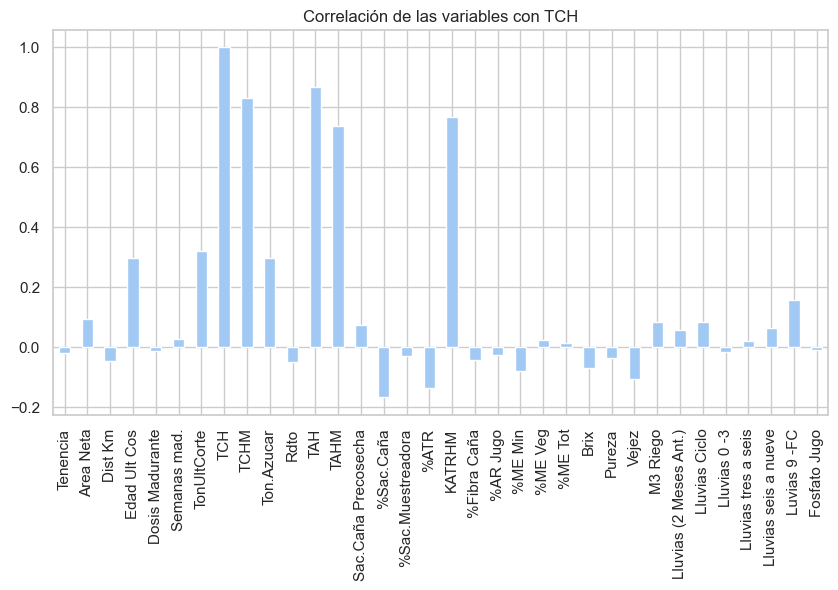

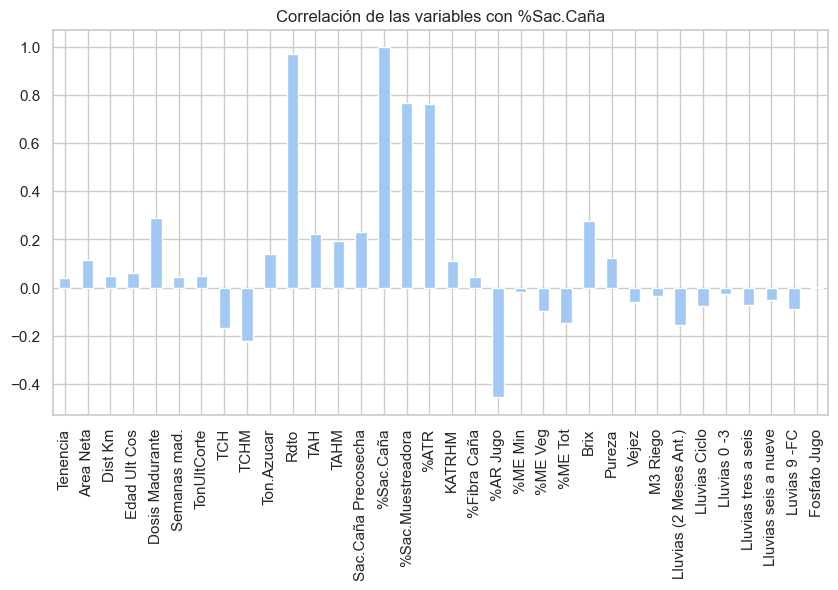

In [19]:
#obtenenmos los nombres de las columnas tipo float64
float_columns = data.select_dtypes(include=['float64']).columns
print(float_columns)
#obtenemos las columnas tipo float cuya correlacion con TCH y con la variable %Sac.Caña sea cercana a 0     
correlation_tch = data[float_columns].corr()
correlation_tch = correlation_tch['TCH']
print(correlation_tch)
correlation_sac = data[float_columns].corr()
correlation_sac = correlation_sac['%Sac.Caña']
print(correlation_sac)
#grafiocamos la correlacion de las variables con TCH
plt.figure(figsize=(10, 5)) 
correlation_tch.plot(kind='bar')
plt.title("Correlación de las variables con TCH")
plt.show()
#grafiocamos la correlacion de las variables con %Sac.Caña
plt.figure(figsize=(10, 5))
correlation_sac.plot(kind='bar')
plt.title("Correlación de las variables con %Sac.Caña")
plt.show()






- la matriz de correlacion nos muestra que no todas las variables numerica tienen un acorrelacion fuerte 

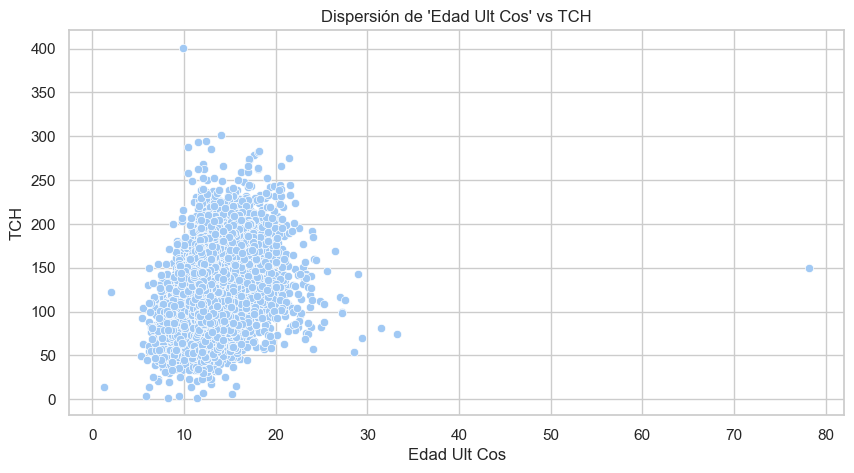

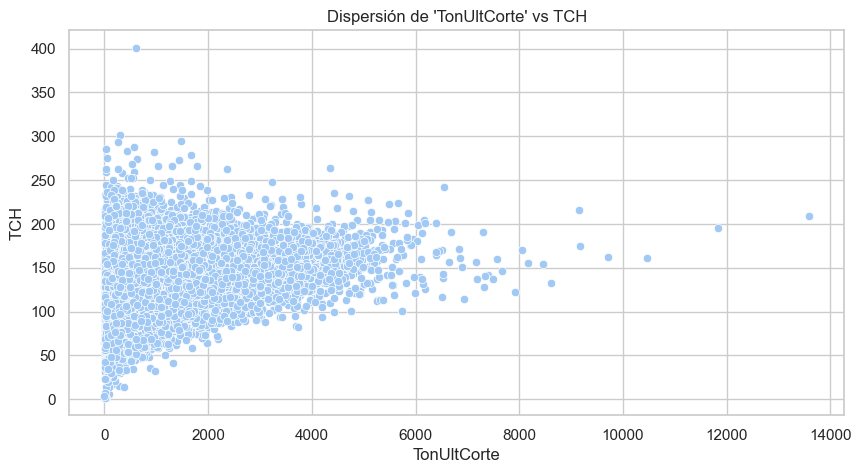

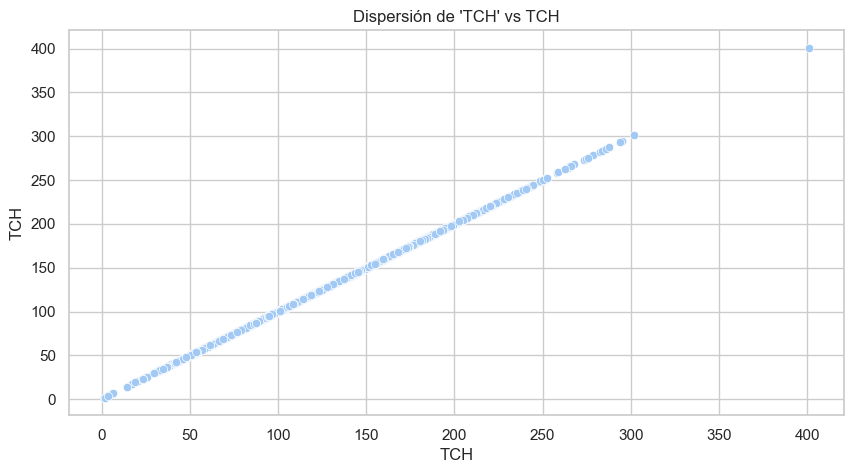

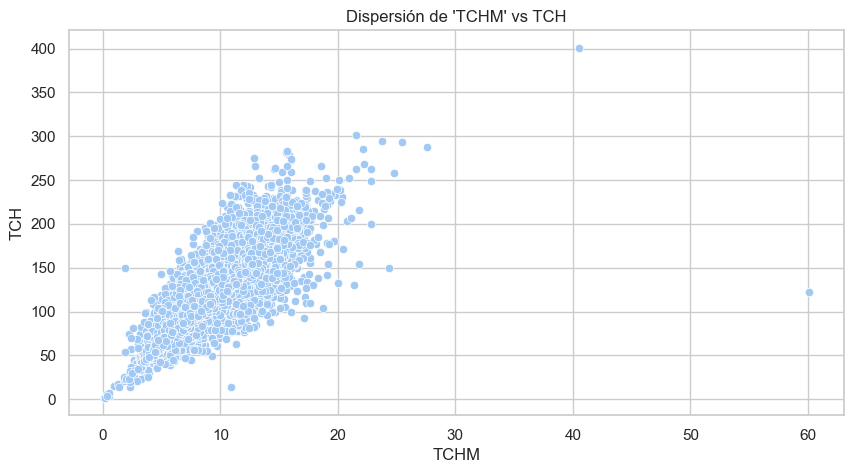

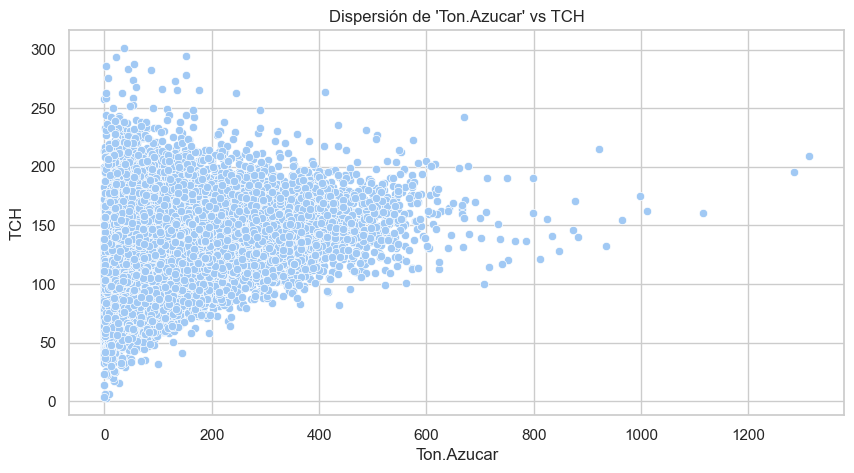

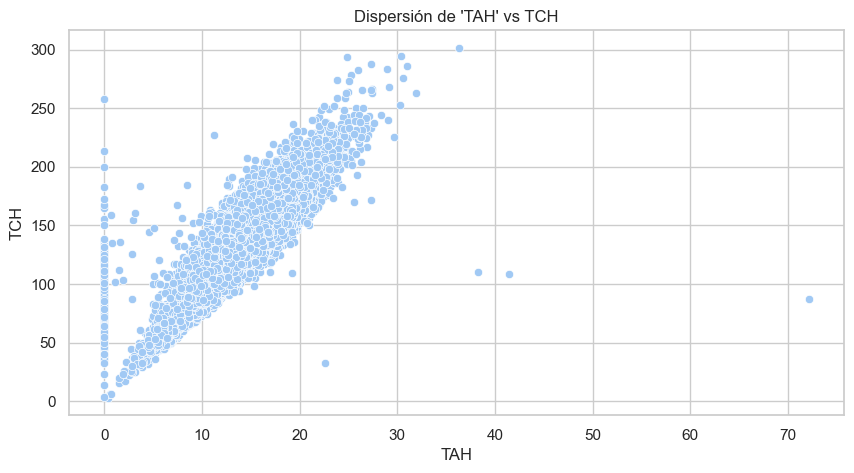

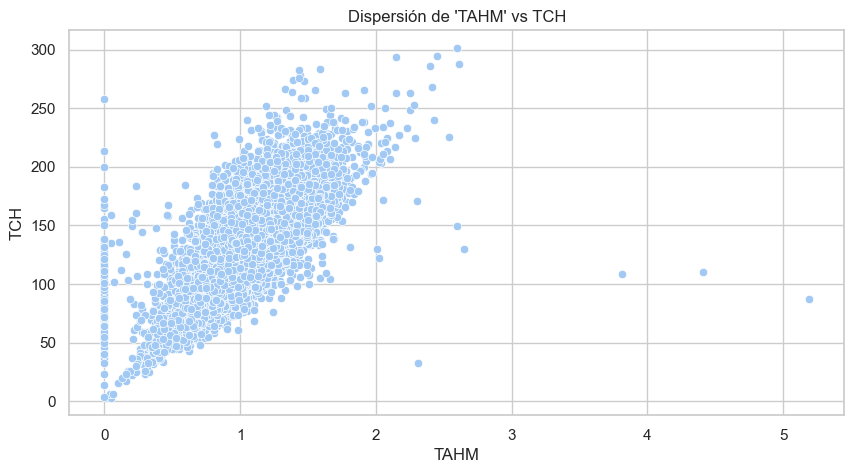

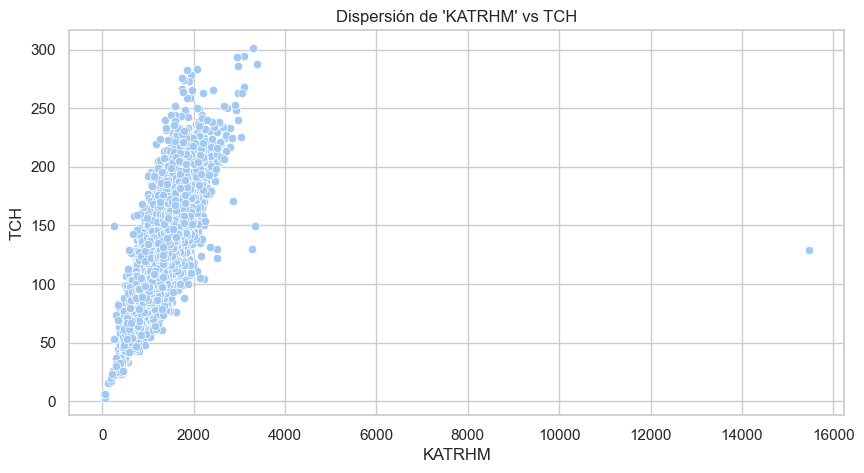

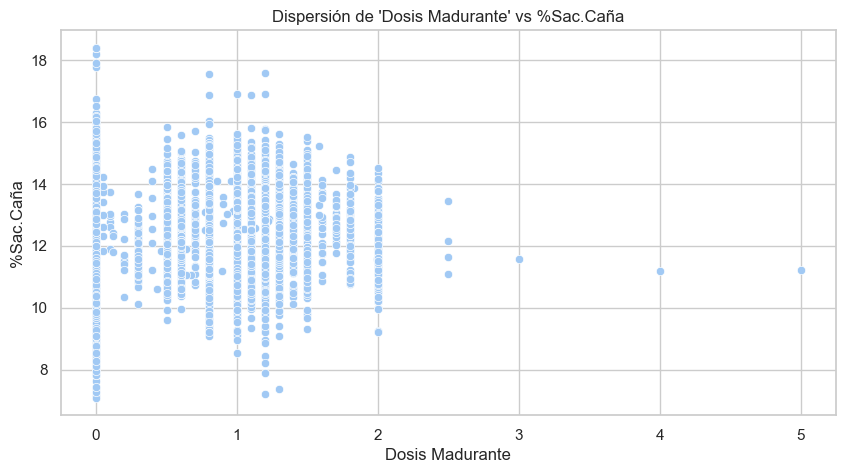

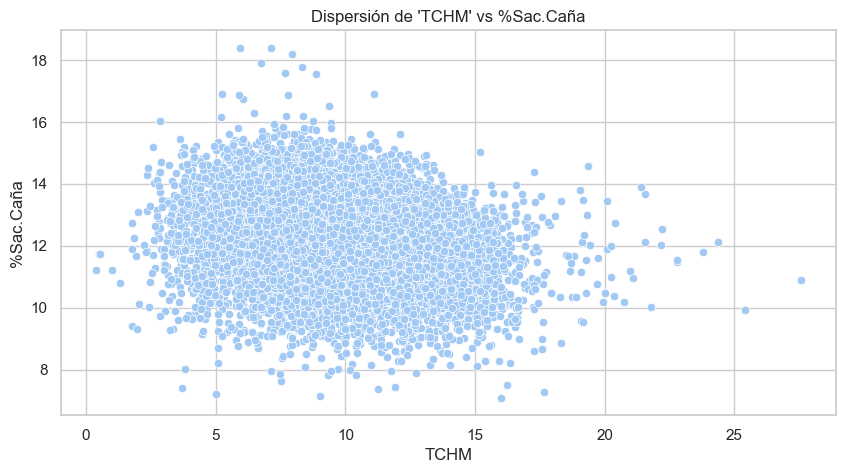

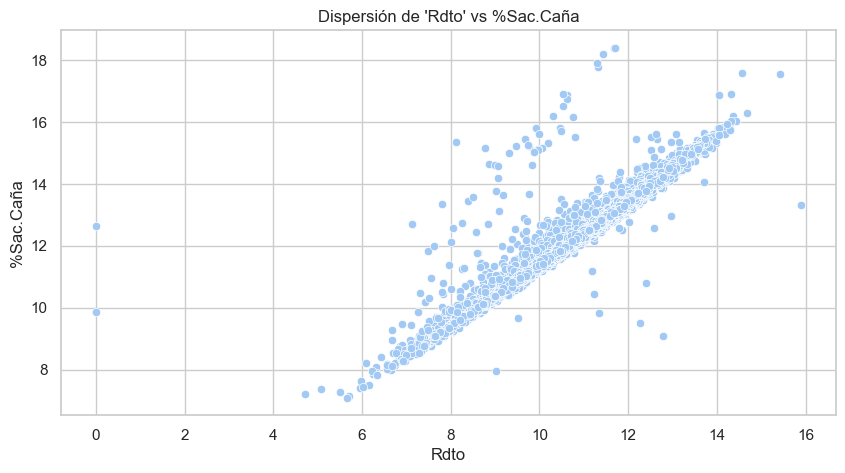

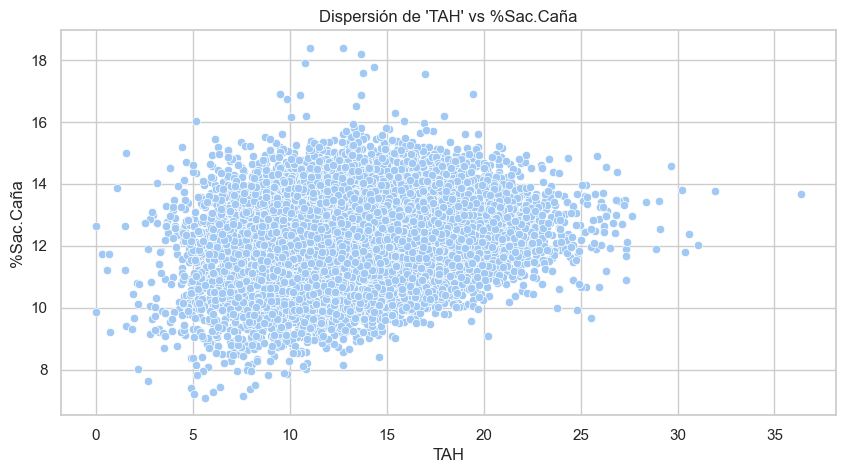

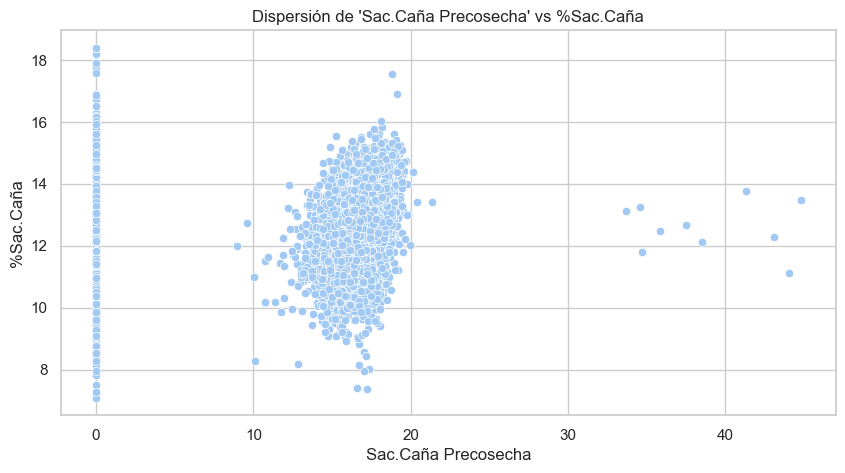

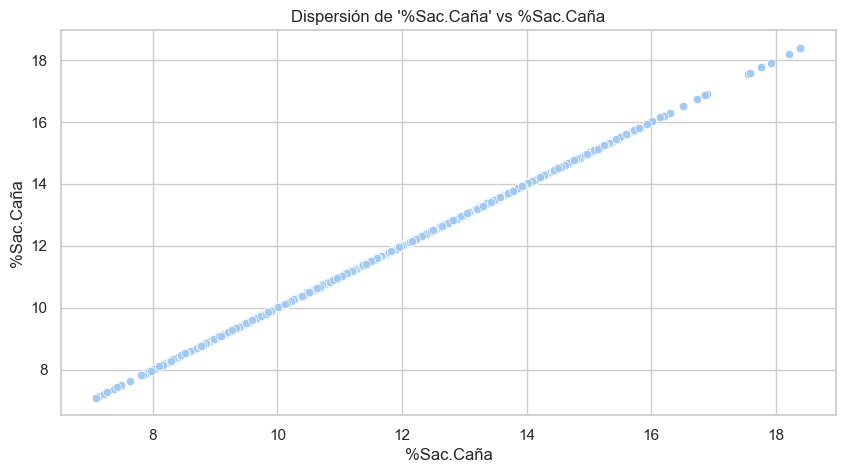

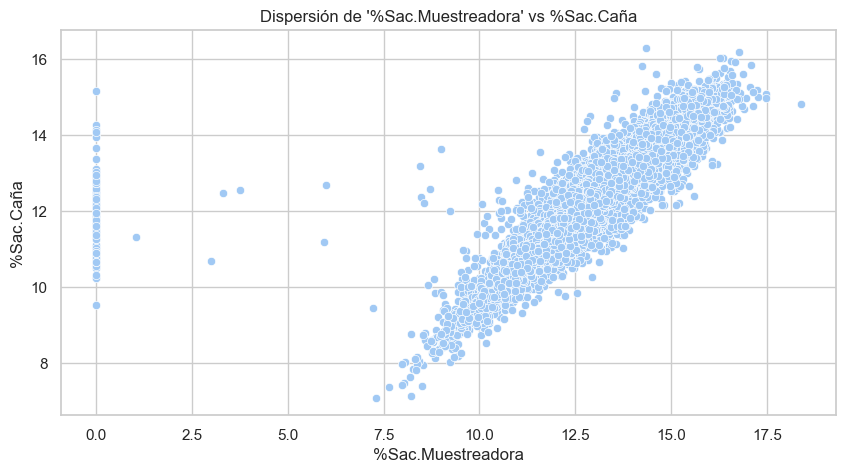

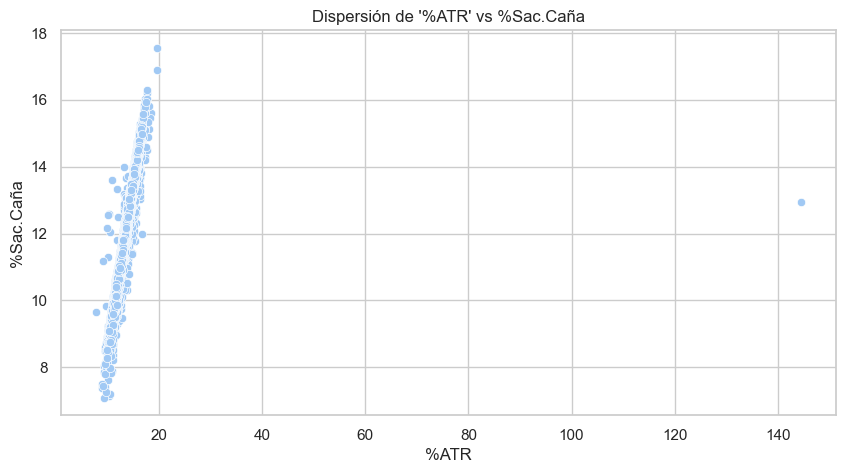

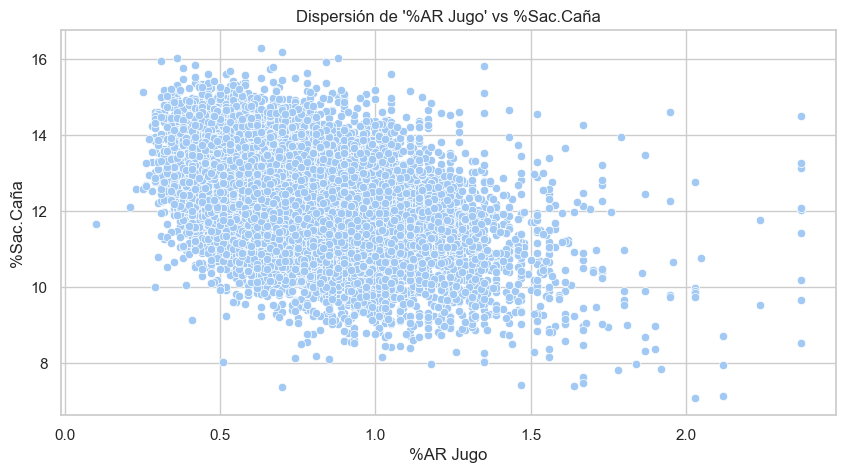

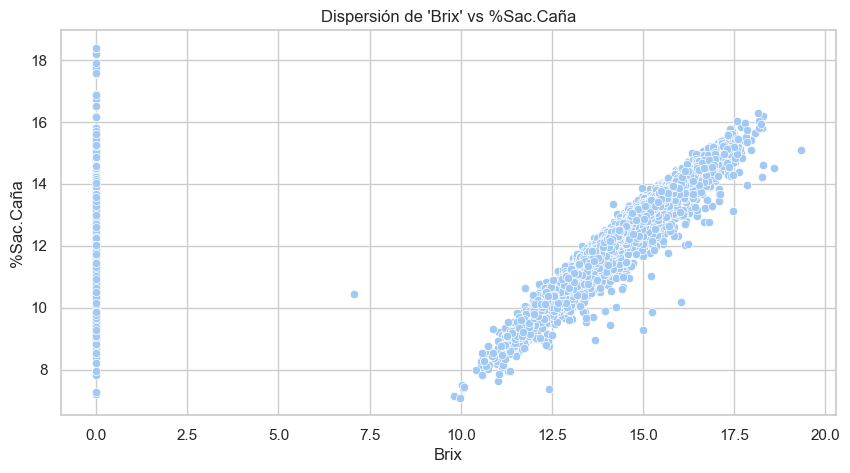

In [20]:

positiveCorrelationIndicatorFilter = 0.2
negativeCorrelationIndicatorFilter = -0.2
#Graficamos la dispersion de las variables con correlacion mayor a 0.3 con TCH y con %Sac.Caña
for column in correlation_tch[(correlation_tch > positiveCorrelationIndicatorFilter) | (correlation_tch < negativeCorrelationIndicatorFilter)].index:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=data, x=column, y='TCH')
    plt.title(f"Dispersión de '{column}' vs TCH")
    plt.show()
for column in correlation_sac[(correlation_sac > positiveCorrelationIndicatorFilter) | (correlation_sac < negativeCorrelationIndicatorFilter)].index:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=data, x=column, y='%Sac.Caña')
    plt.title(f"Dispersión de '{column}' vs %Sac.Caña")
    plt.show()




In [21]:
# Columnas que se graficaron
columns_to_keep = correlation_tch[(correlation_tch > positiveCorrelationIndicatorFilter) | (correlation_tch < negativeCorrelationIndicatorFilter)].index.tolist()
columns_to_keep += correlation_sac[(correlation_sac > positiveCorrelationIndicatorFilter) | (correlation_sac < negativeCorrelationIndicatorFilter)].index.tolist()

# Añadimos las columnas objetivo
columns_to_keep += ['TCH', '%Sac.Caña']

# Eliminamos las columnas numéricas que no se graficaron
columns_to_drop = [col for col in float_columns if col not in columns_to_keep]
data = data.drop(columns=columns_to_drop)

# Mostramos la información del dataset después de eliminar las columnas
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Zona                 21027 non-null  object 
 1   Suerte               21027 non-null  object 
 2   Cod.Estado #         21027 non-null  int64  
 3   Cod.Estado           21027 non-null  object 
 4   Edad Ult Cos         21027 non-null  float64
 5   Destino 1=Semilla    21027 non-null  int64  
 6   Dosis Madurante      20923 non-null  float64
 7   TonUltCorte          21027 non-null  float64
 8   TCH                  21027 non-null  float64
 9   TCHM                 21027 non-null  float64
 10  Ton.Azucar           20786 non-null  float64
 11  Rdto                 20760 non-null  float64
 12  TAH                  20786 non-null  float64
 13  TAHM                 20786 non-null  float64
 14  Sac.Caña Precosecha  19929 non-null  float64
 15  %Sac.Caña            20578 non-null 

In [22]:
#validamos nulos
null_counts = data.isnull().sum()
print(null_counts)


Zona                      0
Suerte                    0
Cod.Estado #              0
Cod.Estado                0
Edad Ult Cos              0
Destino 1=Semilla         0
Dosis Madurante         104
TonUltCorte               0
TCH                       0
TCHM                      0
Ton.Azucar              241
Rdto                    267
TAH                     241
TAHM                    241
Sac.Caña Precosecha    1098
%Sac.Caña               449
%Sac.Muestreadora      1858
%ATR                    522
KATRHM                  522
%AR Jugo               2124
Brix                    267
T.Corte                   0
Cerca de                126
DDUlt.Riego               0
year                      0
month                     0
dtype: int64


In [23]:
#eliminamos las filas donde hay valores nulos para TCH y %Sac.Caña
data = data.dropna(subset=['TCH', '%Sac.Caña'])
data.info()
#Como no conocemos muy bien el negocio no podemos imputar por lo que eliminamos todas las filas donde hay valores nulos
data = data.dropna()
data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 20578 entries, 0 to 20974
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Zona                 20578 non-null  object 
 1   Suerte               20578 non-null  object 
 2   Cod.Estado #         20578 non-null  int64  
 3   Cod.Estado           20578 non-null  object 
 4   Edad Ult Cos         20578 non-null  float64
 5   Destino 1=Semilla    20578 non-null  int64  
 6   Dosis Madurante      20482 non-null  float64
 7   TonUltCorte          20578 non-null  float64
 8   TCH                  20578 non-null  float64
 9   TCHM                 20578 non-null  float64
 10  Ton.Azucar           20578 non-null  float64
 11  Rdto                 20578 non-null  float64
 12  TAH                  20578 non-null  float64
 13  TAHM                 20578 non-null  float64
 14  Sac.Caña Precosecha  19485 non-null  float64
 15  %Sac.Caña            20578 non-null  floa

## Analisis de Outliers

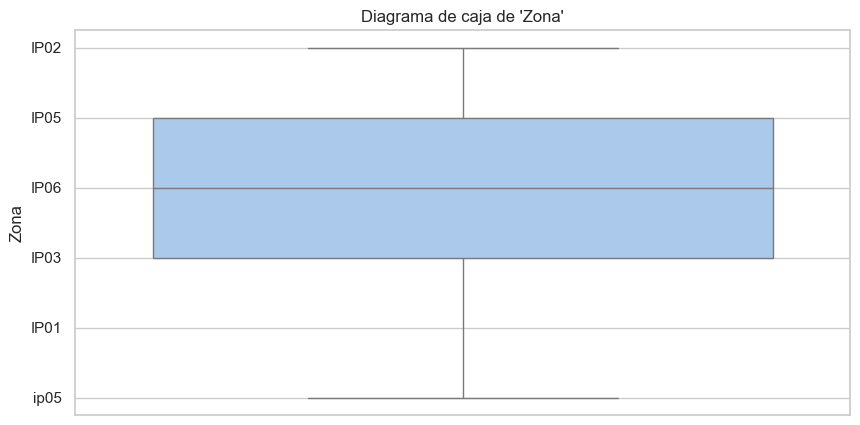

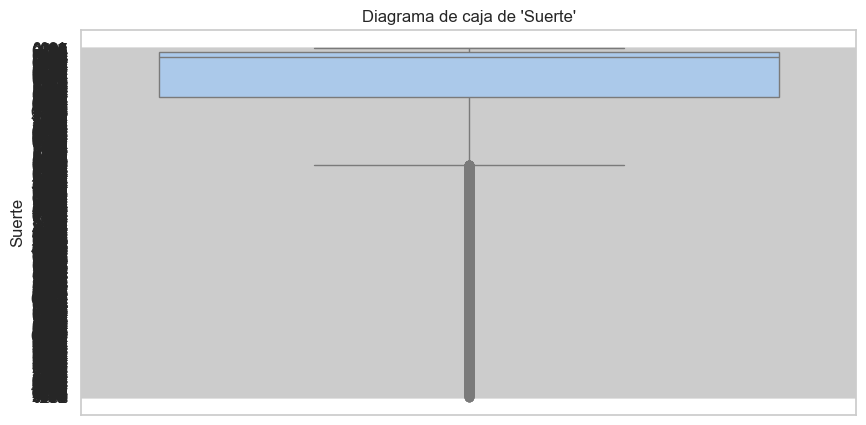

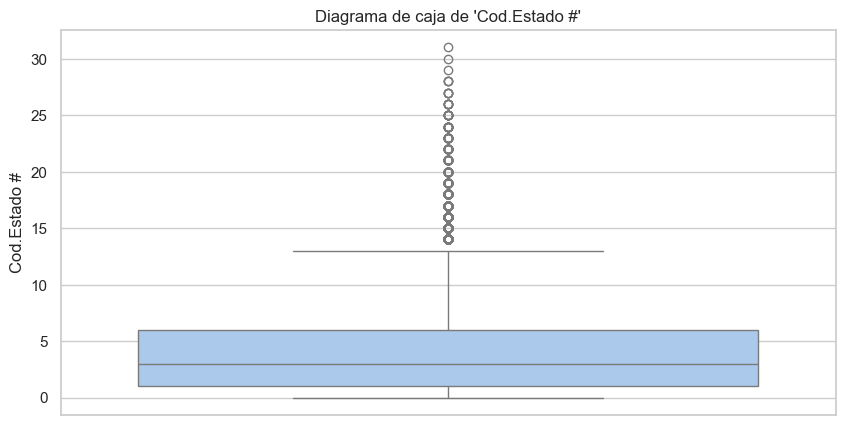

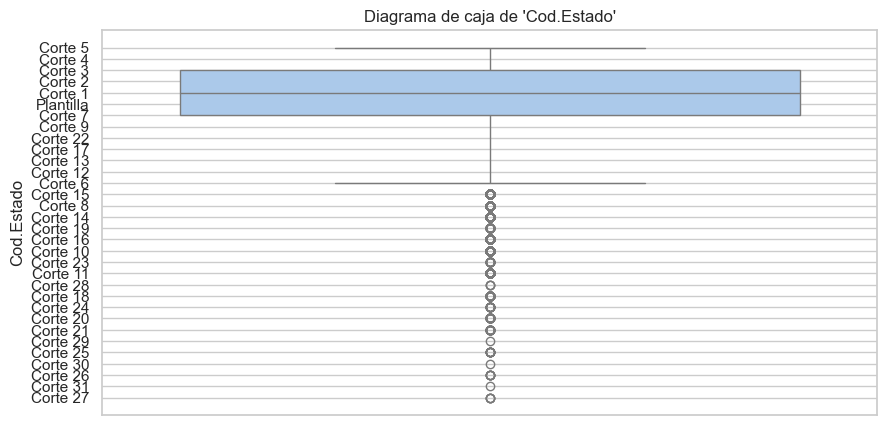

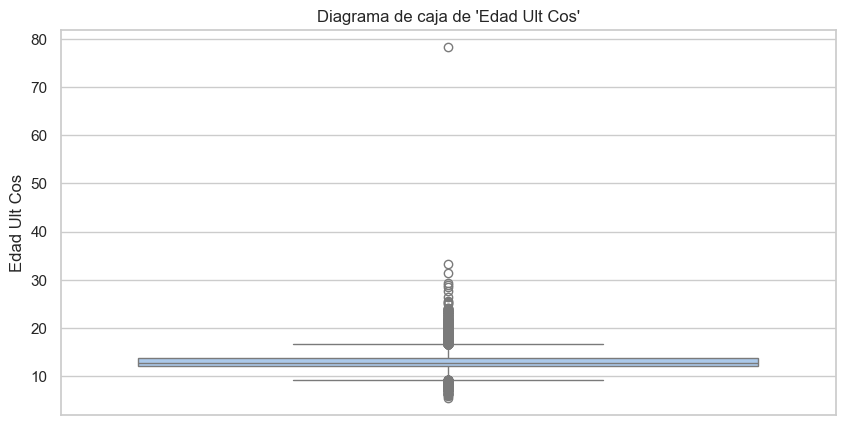

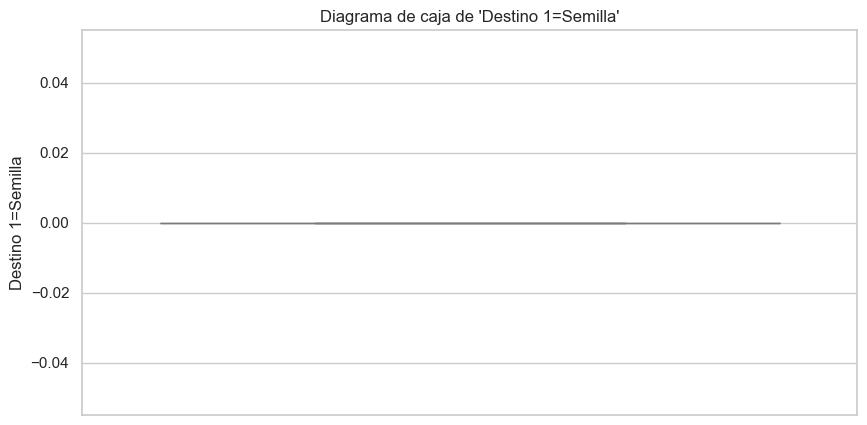

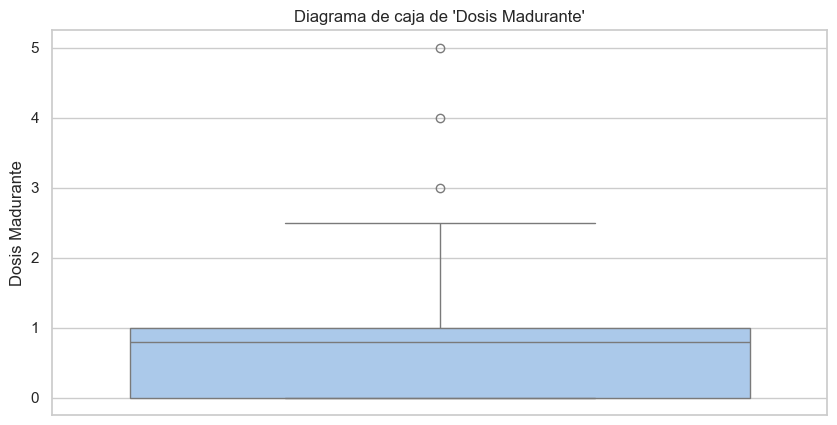

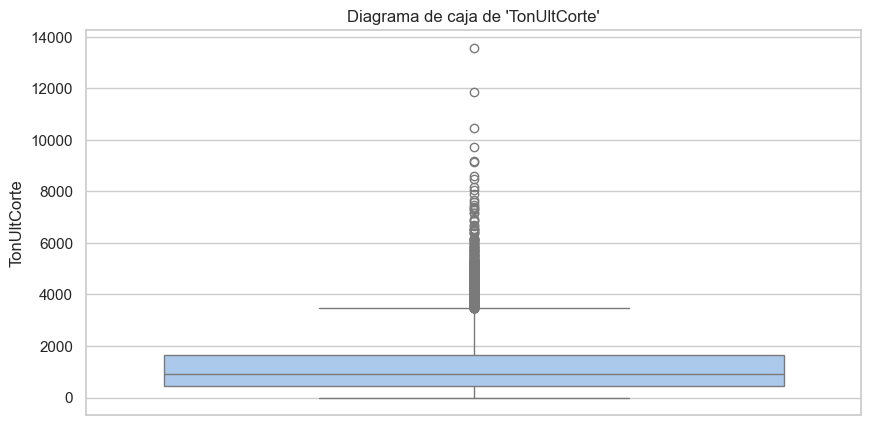

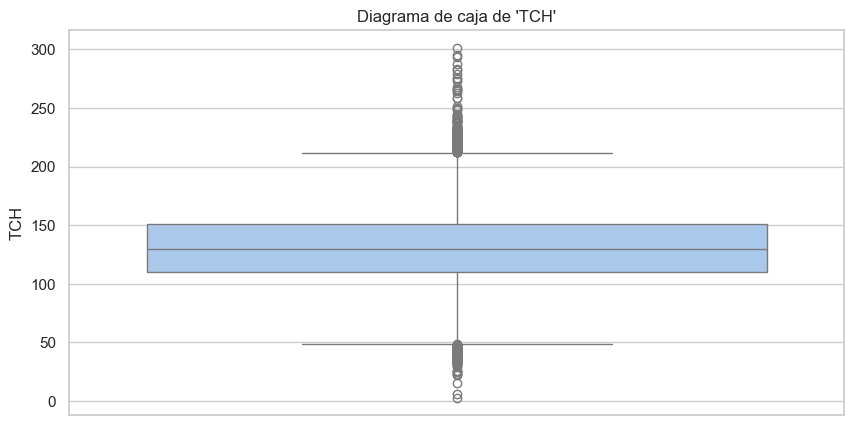

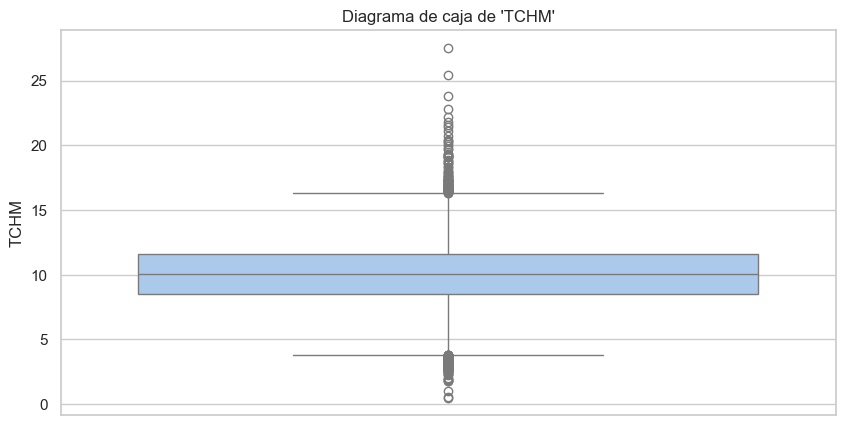

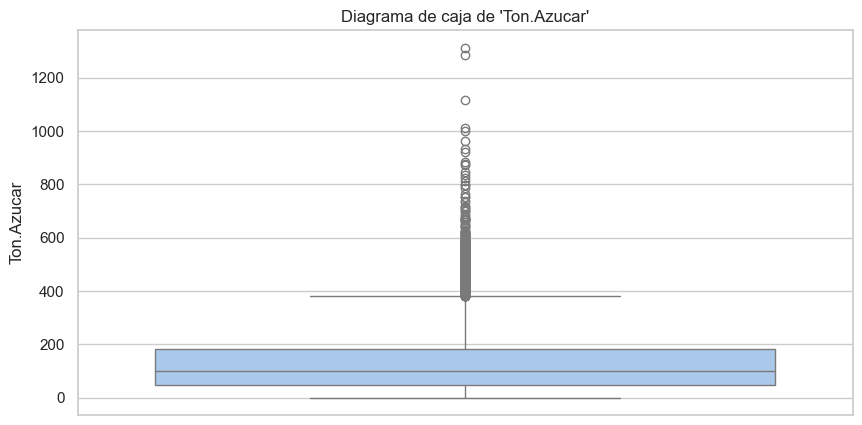

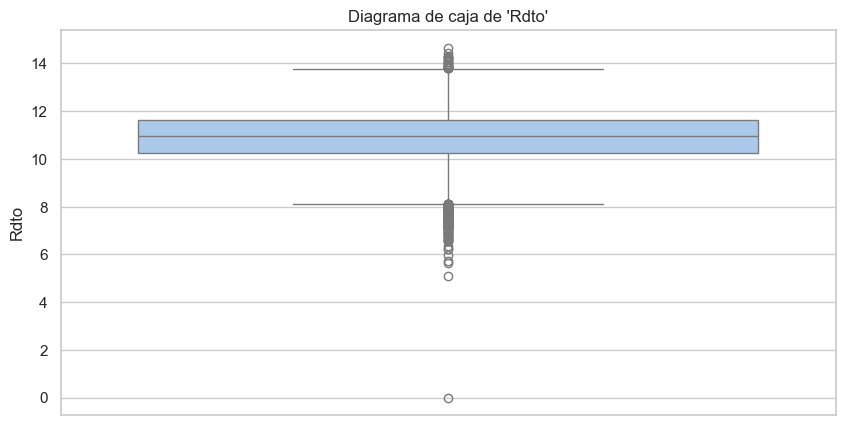

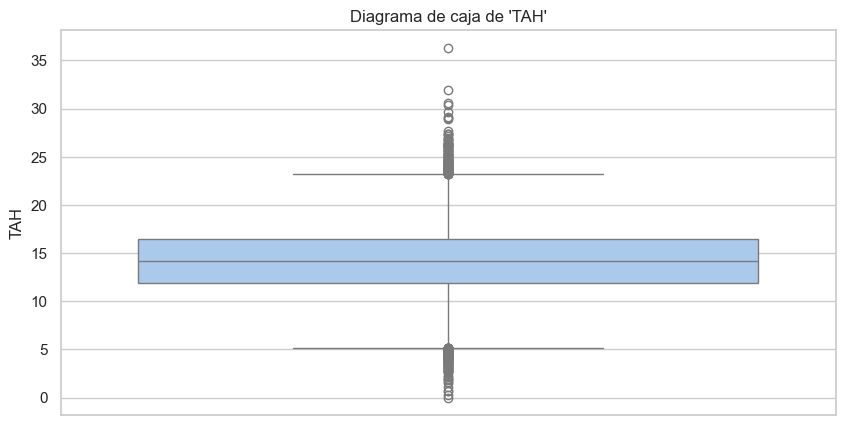

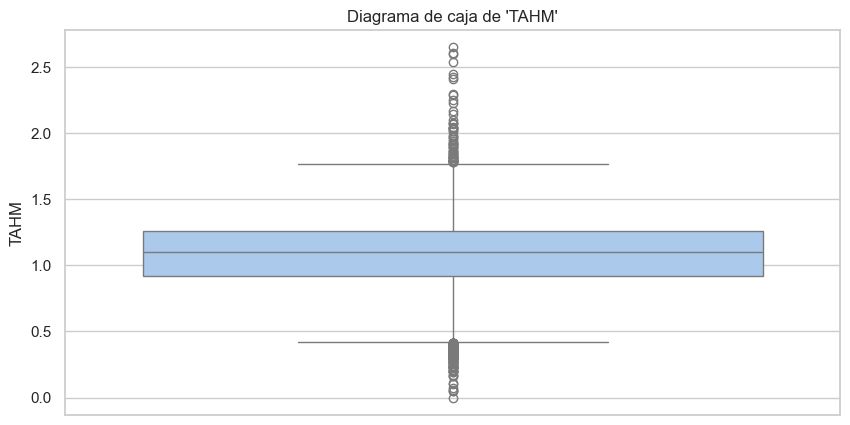

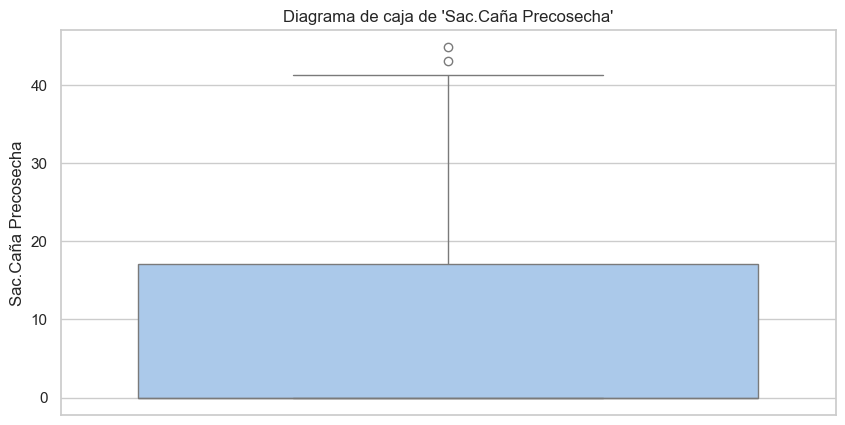

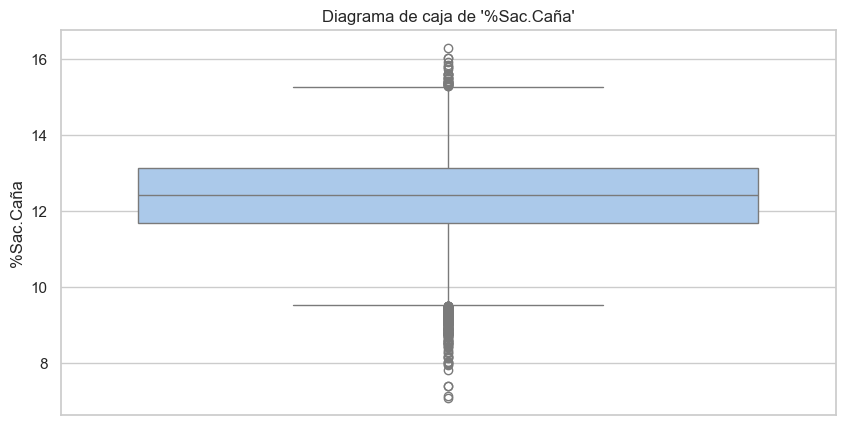

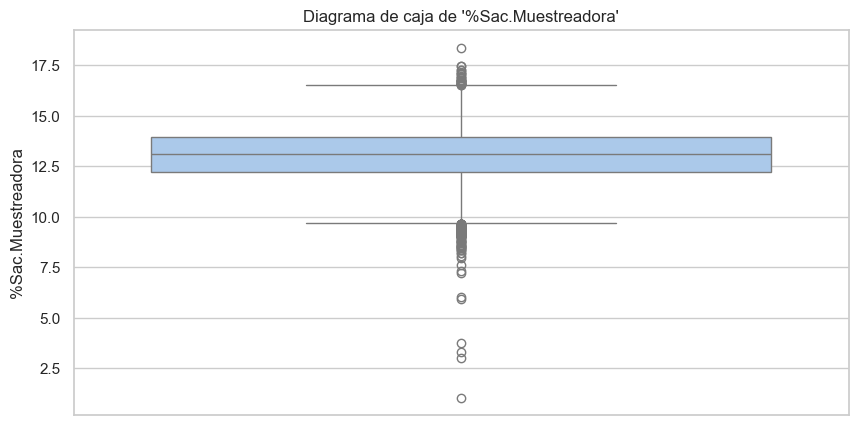

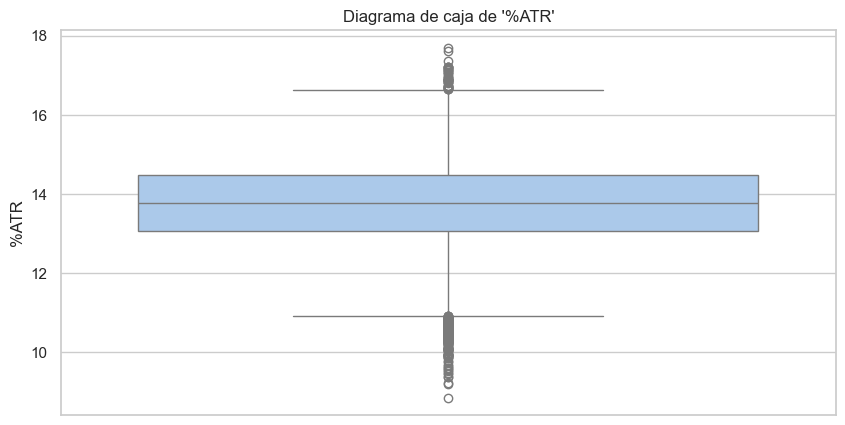

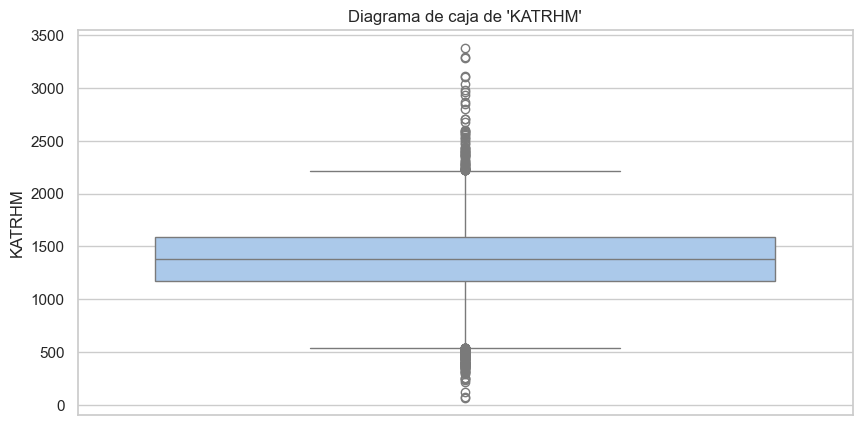

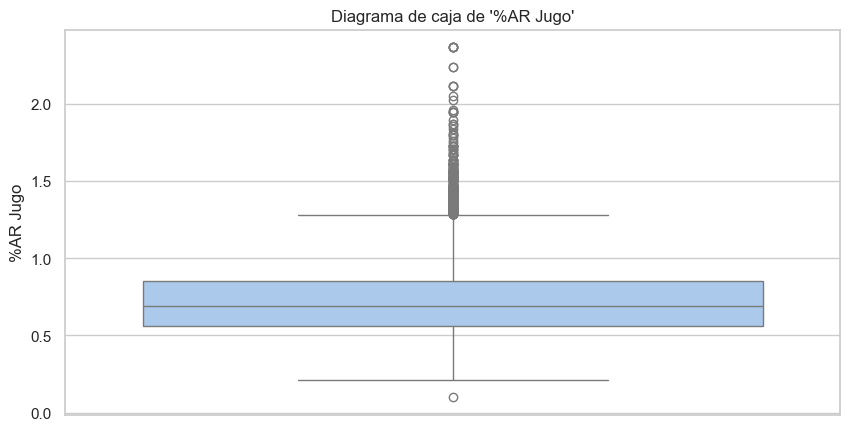

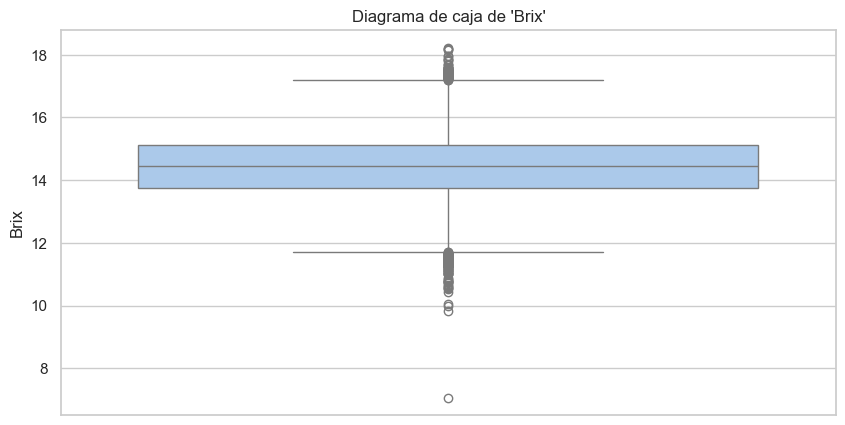

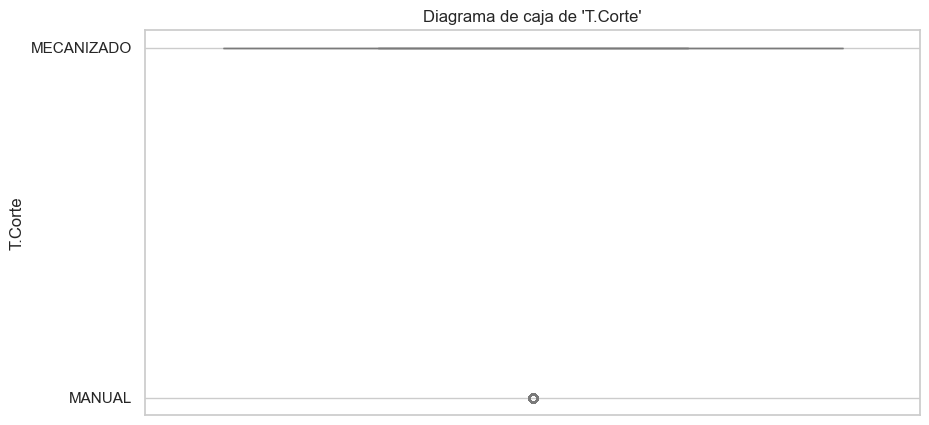

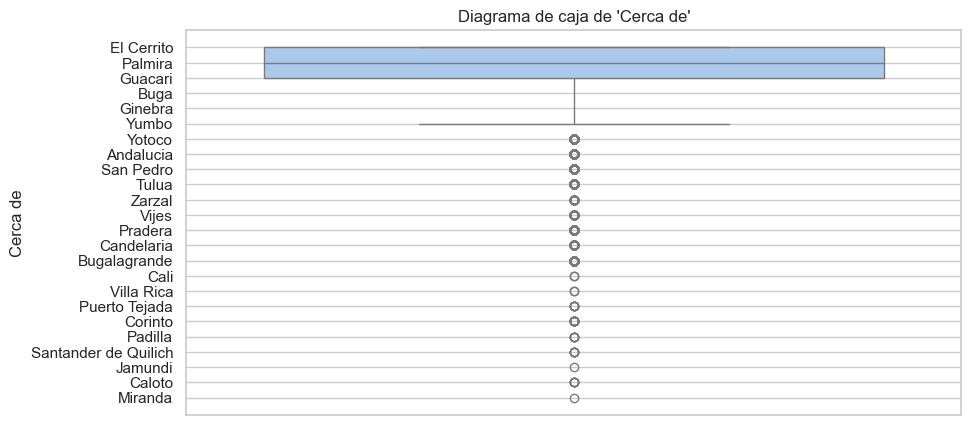

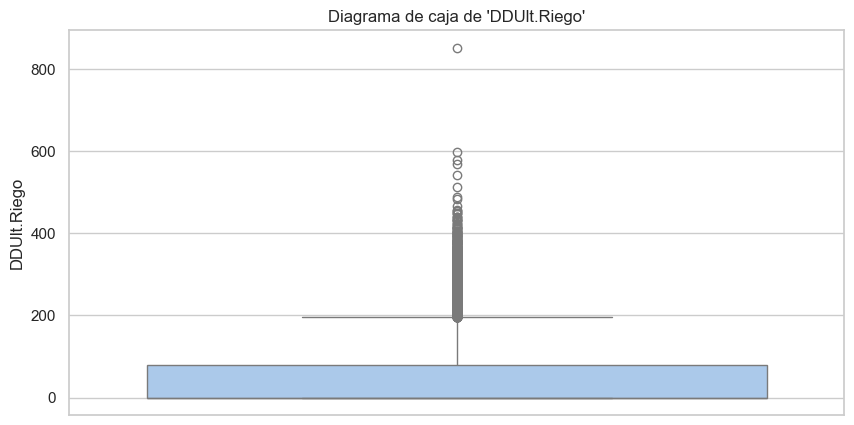

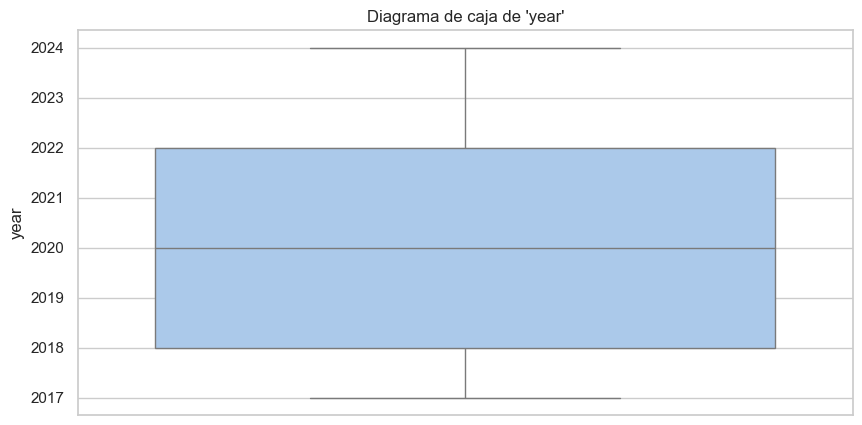

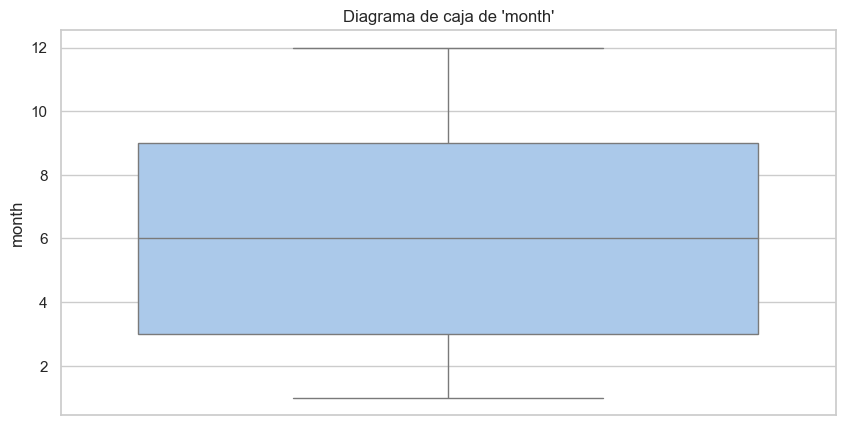

In [24]:
#diagramamos posibles outliers de cada variable
for column in data.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, y=column)
    plt.title(f"Diagrama de caja de '{column}'")
    plt.show()
    


In [25]:
#Eliminamos los outliers de las variables numericas
for column in data.columns:
    if data[column].dtype == 'float64':
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

In [26]:
#eliminamos los outliers de las variables categoricas
for column in data.columns:
    if data[column].dtype == 'object':
        data = data[data[column] != 'OUTLIER']
        

In [27]:
#dividimos el dataset en dos, uno para TCHE y otro para %Sac.Caña
X_tch = data.drop(columns=['TCH'])
y_tch = data['TCH']
X_sac = data.drop(columns=['%Sac.Caña'])
y_sac = data['%Sac.Caña']

#dividimos los dataset en entrenamiento y prueba
X_train_tch, X_test_tch, y_train_tch, y_test_tch = train_test_split(X_tch, y_tch, test_size=0.2, random_state=42)
X_train_sac, X_test_sac, y_train_sac, y_test_sac = train_test_split(X_sac, y_sac, test_size=0.2, random_state=42)



## Ingeniería de Características (Feature Engineering)

In [28]:
#convertimos las variables tipo object a variables categoricas
categorical_columns = X_train_tch.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X_train_tch[column] = X_train_tch[column].astype('category')
    X_test_tch[column] = X_test_tch[column].astype('category')
    X_train_tch[column] = X_train_tch[column].cat.codes
    X_test_tch[column] = X_test_tch[column].cat.codes
categorical_columns = X_train_sac.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X_train_sac[column] = X_train_sac[column].astype('category')
    X_test_sac[column] = X_test_sac[column].astype('category')
    X_train_sac[column] = X_train_sac[column].cat.codes
    X_test_sac[column] = X_test_sac[column].cat.codes
    

In [29]:
X_train_tch.info()
X_test_tch.info()
X_train_sac.info()
X_test_sac.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11848 entries, 6466 to 9888
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Zona                 11848 non-null  int8   
 1   Suerte               11848 non-null  int16  
 2   Cod.Estado #         11848 non-null  int64  
 3   Cod.Estado           11848 non-null  int8   
 4   Edad Ult Cos         11848 non-null  float64
 5   Destino 1=Semilla    11848 non-null  int64  
 6   Dosis Madurante      11848 non-null  float64
 7   TonUltCorte          11848 non-null  float64
 8   TCHM                 11848 non-null  float64
 9   Ton.Azucar           11848 non-null  float64
 10  Rdto                 11848 non-null  float64
 11  TAH                  11848 non-null  float64
 12  TAHM                 11848 non-null  float64
 13  Sac.Caña Precosecha  11848 non-null  float64
 14  %Sac.Caña            11848 non-null  float64
 15  %Sac.Muestreadora    11848 non-null  fl

In [30]:
#Aplicamos feature engineering para las variables categoricas usando one hot encoding
X_train_tch = pd.get_dummies(X_train_tch)
X_test_tch = pd.get_dummies(X_test_tch)
X_train_sac = pd.get_dummies(X_train_sac)
X_test_sac = pd.get_dummies(X_test_sac)
#mostroamos como quedo el dataset despues de aplicar one hot encoding
X_train_tch.info()
X_test_tch.info()
X_train_sac.info()
X_test_sac.info()




<class 'pandas.core.frame.DataFrame'>
Index: 11848 entries, 6466 to 9888
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Zona                 11848 non-null  int8   
 1   Suerte               11848 non-null  int16  
 2   Cod.Estado #         11848 non-null  int64  
 3   Cod.Estado           11848 non-null  int8   
 4   Edad Ult Cos         11848 non-null  float64
 5   Destino 1=Semilla    11848 non-null  int64  
 6   Dosis Madurante      11848 non-null  float64
 7   TonUltCorte          11848 non-null  float64
 8   TCHM                 11848 non-null  float64
 9   Ton.Azucar           11848 non-null  float64
 10  Rdto                 11848 non-null  float64
 11  TAH                  11848 non-null  float64
 12  TAHM                 11848 non-null  float64
 13  Sac.Caña Precosecha  11848 non-null  float64
 14  %Sac.Caña            11848 non-null  float64
 15  %Sac.Muestreadora    11848 non-null  fl

In [31]:
X_train_sac.info()
X_train_tch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11848 entries, 6466 to 9888
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Zona                 11848 non-null  int8   
 1   Suerte               11848 non-null  int16  
 2   Cod.Estado #         11848 non-null  int64  
 3   Cod.Estado           11848 non-null  int8   
 4   Edad Ult Cos         11848 non-null  float64
 5   Destino 1=Semilla    11848 non-null  int64  
 6   Dosis Madurante      11848 non-null  float64
 7   TonUltCorte          11848 non-null  float64
 8   TCH                  11848 non-null  float64
 9   TCHM                 11848 non-null  float64
 10  Ton.Azucar           11848 non-null  float64
 11  Rdto                 11848 non-null  float64
 12  TAH                  11848 non-null  float64
 13  TAHM                 11848 non-null  float64
 14  Sac.Caña Precosecha  11848 non-null  float64
 15  %Sac.Muestreadora    11848 non-null  fl

## REGULARIZACION

In [32]:
#Regularizamos los datos
from sklearn.preprocessing import StandardScaler # type: ignore
scaler = StandardScaler()
X_train_tch = scaler.fit_transform(X_train_tch)
X_test_tch = scaler.transform(X_test_tch)
X_train_sac = scaler.fit_transform(X_train_sac)
X_test_sac = scaler.transform(X_test_sac)


Error cuadrático medio para TCH: 1.366373645285355
Coeficiente de determinación R2 para TCH: 0.9982078599931024
[ 2.59922095e-02  5.82799713e-03  4.29149693e-03 -6.38261180e-03
  1.02473255e+00  4.79616347e-14 -1.07969897e-02  1.15317714e+00
  2.51336184e+01 -1.16958772e+00 -1.17564975e+00  2.60535827e+01
 -2.29905437e+01  9.81399724e-02  3.94662998e-01  8.31334604e-02
 -1.25471397e-01  8.62946292e-02  3.39794000e-03  3.86895014e-02
  4.24969222e-02 -3.29712175e-03 -3.30330987e-02  3.38655403e-03
 -2.62078776e-02]


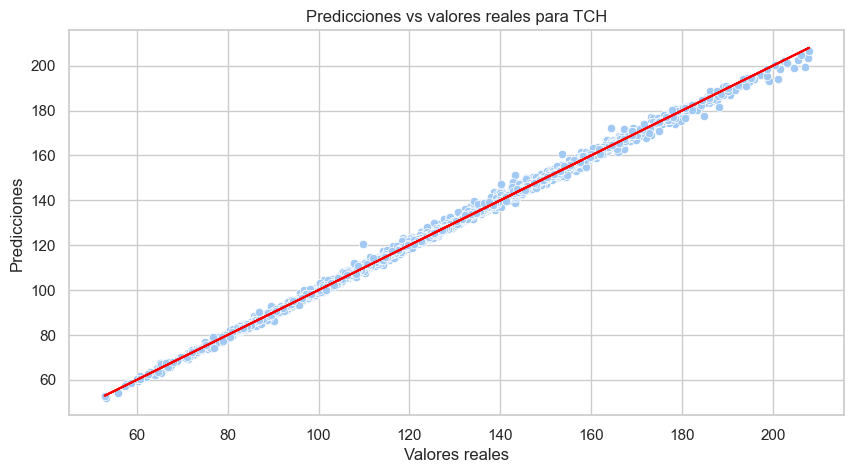

In [42]:
#Entrenamos el modelo de regresion lineal para TCH
model_tch = LinearRegression()
model_tch.fit(X_train_tch, y_train_tch)
y_pred_tch = model_tch.predict(X_test_tch)
mse_tch = mean_squared_error(y_test_tch, y_pred_tch)
r2_tch = r2_score(y_test_tch, y_pred_tch)
print(f"Error cuadrático medio para TCH: {mse_tch}")
print(f"Coeficiente de determinación R2 para TCH: {r2_tch}")
#imprimimos los coeficientes de la regresion
print(model_tch.coef_)
#graficamos la recta de regresion
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test_tch, y=y_pred_tch)
plt.plot(y_test_tch, y_test_tch, color='red')
plt.title("Predicciones vs valores reales para TCH")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()


Error cuadrático medio para %Sac.Caña: 0.0025249996983466565
Coeficiente de determinación R2 para %Sac.Caña: 0.9973762385694116
[ 1.28175739e-03  5.12893518e-04  6.00531172e-04  1.85450391e-03
 -8.17163741e-03  1.59594560e-16  6.80322356e-04  1.32546686e-02
  2.88699815e-02 -1.15236561e-02 -1.20159374e-02  5.59852391e-01
 -1.78384847e-02  4.50595321e-02  6.83661684e-03 -2.05276445e-03
  2.10546544e-01 -4.60550539e-02 -3.12542322e-02  2.31964576e-01
 -7.15789215e-04  2.18859308e-03  2.06184739e-03  3.62250195e-03
 -2.55510882e-03]


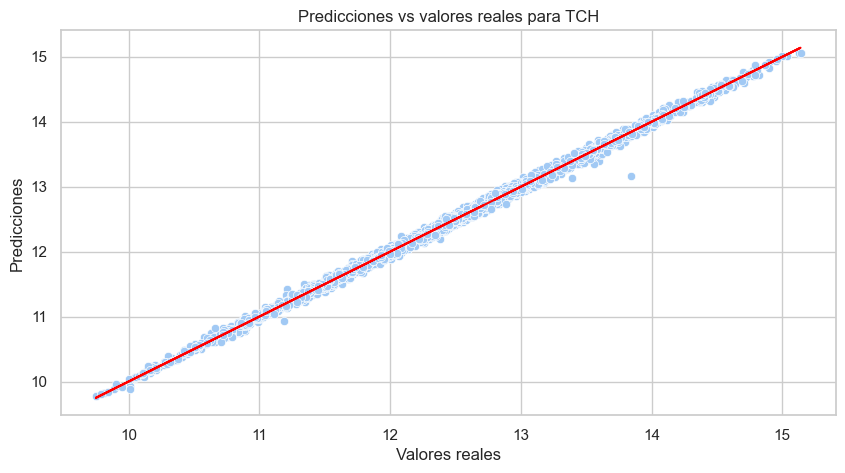

In [43]:
#Entrenamos el modelo de regresion lineal para %Sac.Caña
model_sac = LinearRegression()
model_sac.fit(X_train_sac, y_train_sac)
y_pred_sac = model_sac.predict(X_test_sac)
mse_sac = mean_squared_error(y_test_sac, y_pred_sac)
r2_sac = r2_score(y_test_sac, y_pred_sac)
print(f"Error cuadrático medio para %Sac.Caña: {mse_sac}")
print(f"Coeficiente de determinación R2 para %Sac.Caña: {r2_sac}")
#imprimimos los coeficientes de la regresion
print(model_sac.coef_)
#graficamos la recta de regresion
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test_sac, y=y_pred_sac)
plt.plot(y_test_sac, y_test_sac, color='red')
plt.title("Predicciones vs valores reales para TCH")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

In [34]:
from sklearn.linear_model import SGDRegressor

# Ajustamos el modelo de regresión lineal para TCH usando gradiente descendiente
sgd_regressor_tch = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor_tch.fit(X_train_tch, y_train_tch)
y_pred_tch_sgd = sgd_regressor_tch.predict(X_test_tch)
mse_tch_sgd = mean_squared_error(y_test_tch, y_pred_tch_sgd)
r2_tch_sgd = r2_score(y_test_tch, y_pred_tch_sgd)
print(f"Error cuadrático medio para TCH usando SGD: {mse_tch_sgd}")
print(f"Coeficiente de determinación R2 para TCH usando SGD: {r2_tch_sgd}")

# Ajustamos el modelo de regresión lineal para %Sac.Caña usando gradiente descendiente
sgd_regressor_sac = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor_sac.fit(X_train_sac, y_train_sac)
y_pred_sac_sgd = sgd_regressor_sac.predict(X_test_sac)
mse_sac_sgd = mean_squared_error(y_test_sac, y_pred_sac_sgd)
r2_sac_sgd = r2_score(y_test_sac, y_pred_sac_sgd)
print(f"Error cuadrático medio para %Sac.Caña usando SGD: {mse_sac_sgd}")
print(f"Coeficiente de determinación R2 para %Sac.Caña usando SGD: {r2_sac_sgd}")




Error cuadrático medio para TCH usando SGD: 1.4941616582000727
Coeficiente de determinación R2 para TCH usando SGD: 0.9980402528300568
Error cuadrático medio para %Sac.Caña usando SGD: 0.0029913318509926837
Coeficiente de determinación R2 para %Sac.Caña usando SGD: 0.9968916665052022


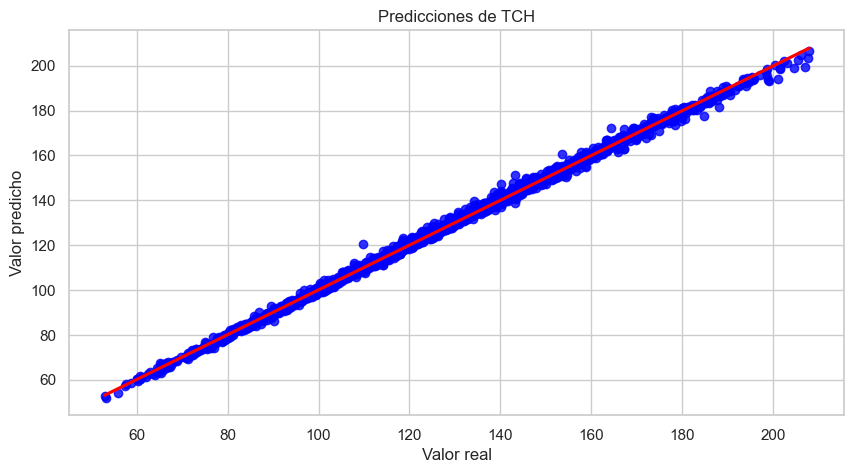

In [47]:
#Graficamos el resulatdo de la regresion incluimos en el grafico la recta de regresion en color rojo com seaborn para sac 
sns.set_palette("dark:salmon_r")
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test_tch, y=y_pred_tch, color='blue',  line_kws={'color': 'red'})
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Predicciones de TCH')
plt.show()



In [36]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para el modelo de TCH
scores_tch = cross_val_score(model_tch, X_train_tch, y_train_tch, cv=5, scoring='r2')
print(f"R2 scores for TCH model: {scores_tch}")
print(f"Mean R2 score for TCH model: {scores_tch.mean()}")

# Validación cruzada para el modelo de %Sac.Caña
scores_sac = cross_val_score(sgd_regressor_sac, X_train_sac, y_train_sac, cv=5, scoring='r2')
print(f"R2 scores for %Sac.Caña model: {scores_sac}")
print(f"Mean R2 score for %Sac.Caña model: {scores_sac.mean()}")

R2 scores for TCH model: [0.99840464 0.99842029 0.99830984 0.9982235  0.99815705]
Mean R2 score for TCH model: 0.9983030642539958
R2 scores for %Sac.Caña model: [0.9965689  0.99667294 0.99654813 0.99572163 0.99575098]
Mean R2 score for %Sac.Caña model: 0.9962525134570658


c:\Users\rchic\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


VIF para el conjunto de datos de TCH:
    feature         VIF
0         0    1.069916
1         1    1.071382
2         2    1.127976
3         3    1.020320
4         4   23.150519
5         5         NaN
6         6    1.285774
7         7  148.579376
8         8  203.212825
9         9  152.071252
10       10  179.220026
11       11  118.554041
12       12  423.647627
13       13    2.224300
14       14  288.404051
15       15    7.704774
16       16  156.710004
17       17  585.575449
18       18    2.874667
19       19   43.688098
20       20    1.223551
21       21    1.055508
22       22    1.197887
23       23    3.169300
24       24    1.090678


c:\Users\rchic\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


VIF para el conjunto de datos de %Sac.Caña:
    feature         VIF
0         0    1.069945
1         1    1.071331
2         2    1.127886
3         3    1.019353
4         4   23.918015
5         5         NaN
6         6    1.285727
7         7  149.524917
8         8  597.068275
9         9  676.525678
10       10  153.054431
11       11   89.389359
12       12  627.099429
13       13  819.129127
14       14    2.217967
15       15    7.708731
16       16  143.870346
17       17  584.966120
18       18    2.591489
19       19   28.090126
20       20    1.224755
21       21    1.054128
22       22    1.197473
23       23    3.165504
24       24    1.089300


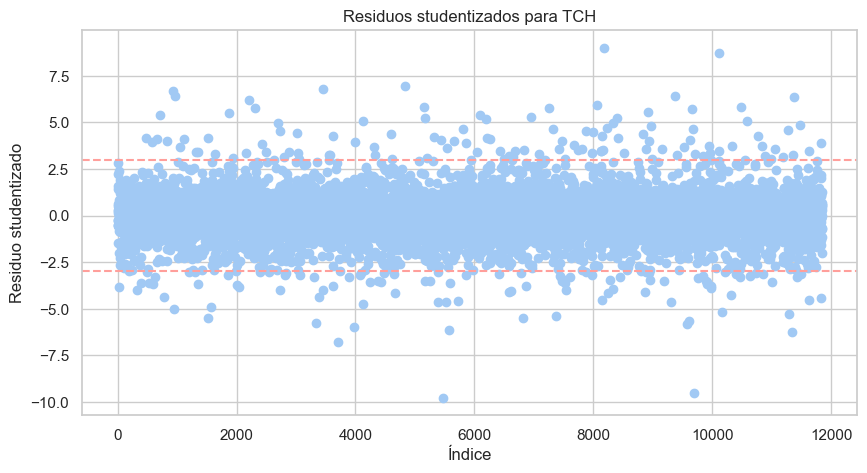

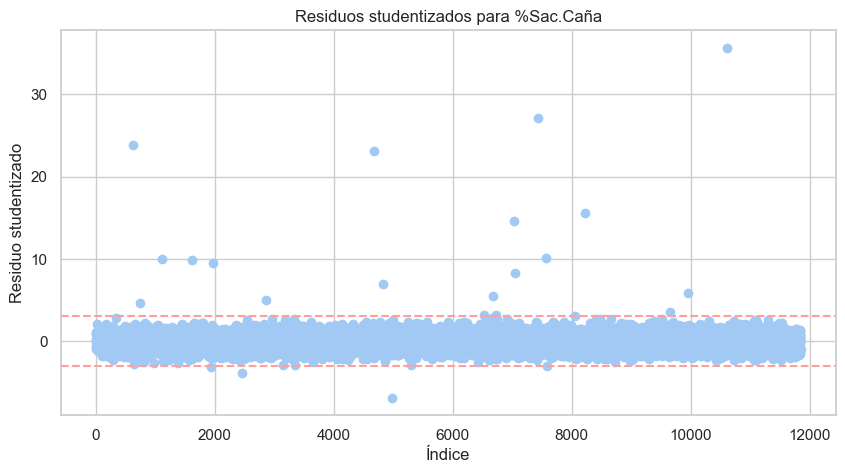

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Calcular el VIF para cada variable independiente en el conjunto de datos de TCH
vif_data_tch = pd.DataFrame()
vif_data_tch["feature"] = pd.DataFrame(X_train_tch).columns
vif_data_tch["VIF"] = [variance_inflation_factor(X_train_tch, i) for i in range(X_train_tch.shape[1])]

print("VIF para el conjunto de datos de TCH:")
print(vif_data_tch)

# Calcular el VIF para cada variable independiente en el conjunto de datos de %Sac.Caña
vif_data_sac = pd.DataFrame()
vif_data_sac["feature"] = pd.DataFrame(X_train_sac).columns
vif_data_sac["VIF"] = [variance_inflation_factor(X_train_sac, i) for i in range(X_train_sac.shape[1])]

print("VIF para el conjunto de datos de %Sac.Caña:")
print(vif_data_sac)

# Identificar outliers utilizando el método de los residuos studentizados
import statsmodels.api as sm

# Añadir una constante para el modelo
X_train_tch_const = sm.add_constant(X_train_tch)
X_train_sac_const = sm.add_constant(X_train_sac)

# Ajustar el modelo de regresión lineal para TCH
model_tch_sm = sm.OLS(y_train_tch, X_train_tch_const).fit()
influence_tch = model_tch_sm.get_influence()
studentized_residuals_tch = influence_tch.resid_studentized_internal

# Ajustar el modelo de regresión lineal para %Sac.Caña
model_sac_sm = sm.OLS(y_train_sac, X_train_sac_const).fit()
influence_sac = model_sac_sm.get_influence()
studentized_residuals_sac = influence_sac.resid_studentized_internal

# Graficar los residuos studentizados para identificar outliers
plt.figure(figsize=(10, 5))
plt.scatter(range(len(studentized_residuals_tch)), studentized_residuals_tch)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Residuo studentizado')
plt.title('Residuos studentizados para TCH')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(range(len(studentized_residuals_sac)), studentized_residuals_sac)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Residuo studentizado')
plt.title('Residuos studentizados para %Sac.Caña')
plt.show()

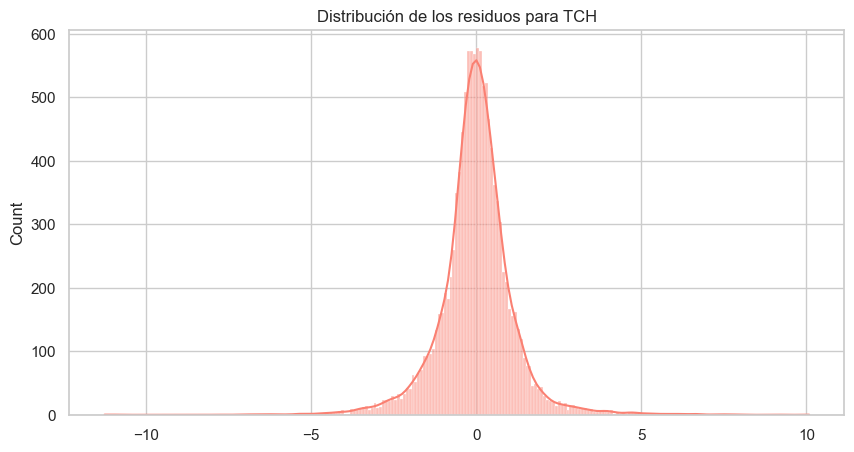

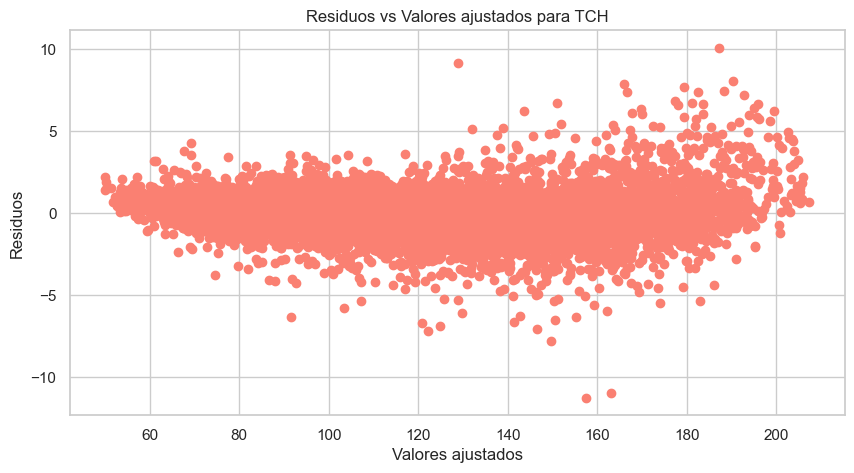

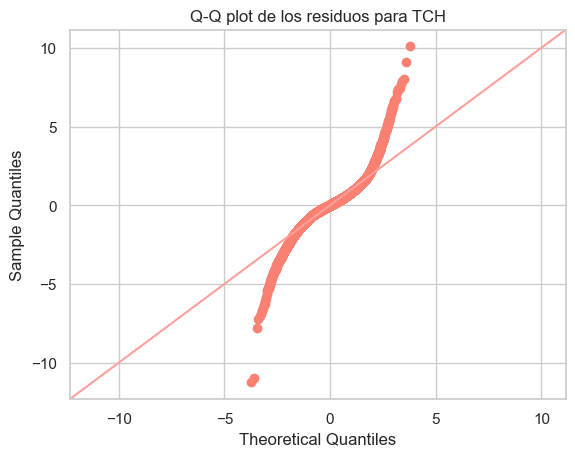

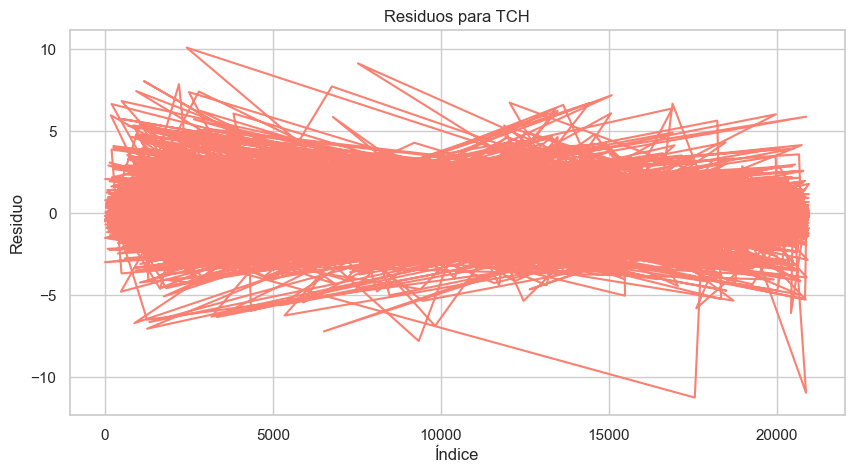

In [ ]:
#analizamos linealidad, homocedasticidad, normalidad de errores, independencia de errores poara tch
# Linealidad: Los residuos deben distribuirse de manera uniforme alrededor de 0
# Homocedasticidad: La varianza de los residuos debe ser constante
# Normalidad de errores: Los residuos deben seguir una distribución normal
# Independencia de errores: Los residuos no deben tener patrones discernibles

#graficamos los la distribucion de los residuos
plt.figure(figsize=(10, 5))
sns.histplot(model_tch_sm.resid, kde=True)
plt.title('Distribución de los residuos para TCH')
plt.show()

#graficamos la varianza de los residuos
plt.figure(figsize=(10, 5))
plt.scatter(model_tch_sm.fittedvalues, model_tch_sm.resid)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores ajustados para TCH')
plt.show()

# Graficamos la normalidad de los residuos usando un Q-Q plot
sm.qqplot(model_tch_sm.resid, line='45')
plt.title('Q-Q plot de los residuos para TCH')
plt.show()

#graficamos la independencia de los residuos
plt.figure(figsize=(10, 5))
plt.plot(model_tch_sm.resid)
plt.xlabel('Índice')
plt.ylabel('Residuo')
plt.title('Residuos para TCH')
plt.show()







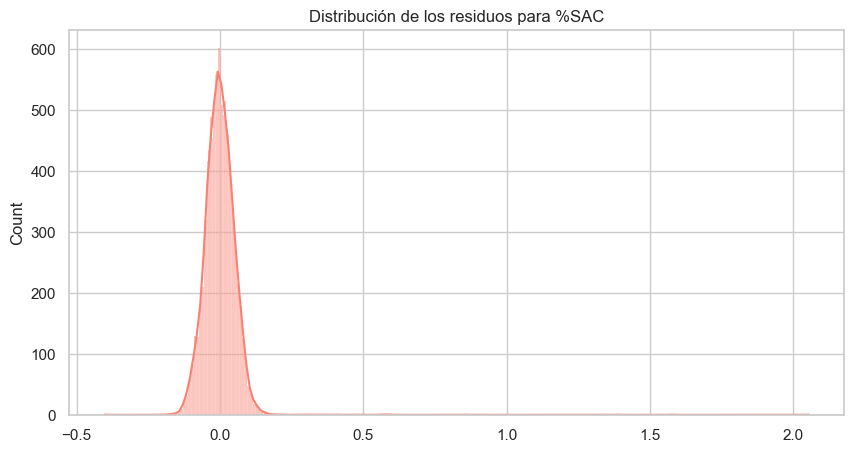

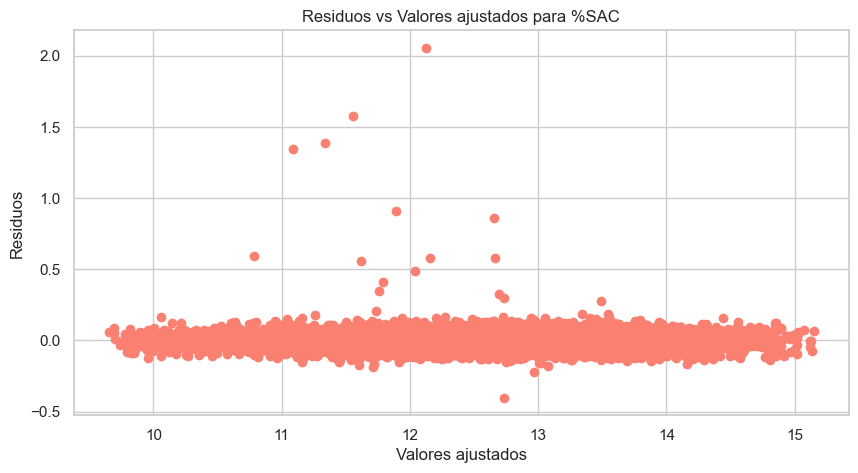

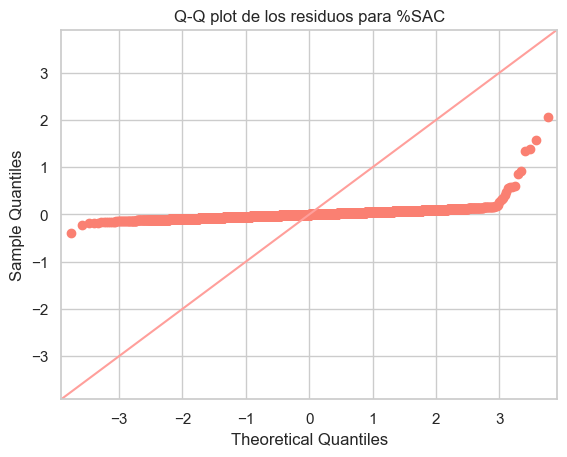

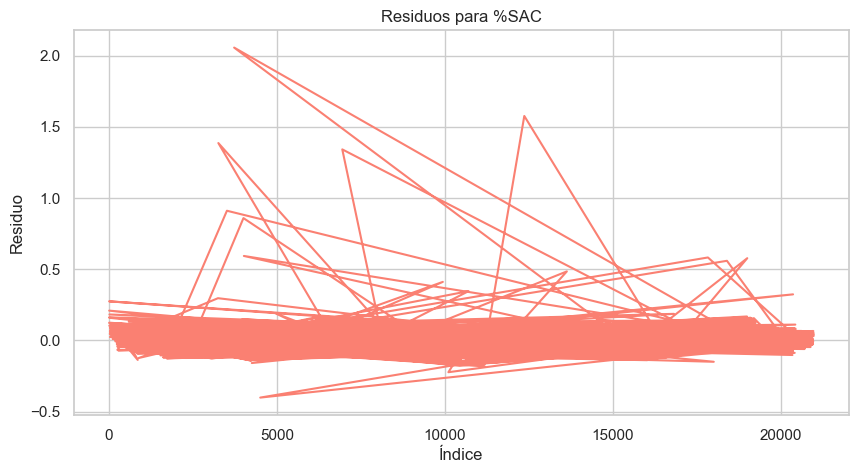

In [51]:
#analizamos linealidad, homocedasticidad, normalidad de errores, independencia de errores poara %sac
# Linealidad: Los residuos deben distribuirse de manera uniforme alrededor de 0
# Homocedasticidad: La varianza de los residuos debe ser constante
# Normalidad de errores: Los residuos deben seguir una distribución normal
# Independencia de errores: Los residuos no deben tener patrones discernibles

#graficamos los la distribucion de los residuos
plt.figure(figsize=(10, 5))
sns.histplot(model_sac_sm.resid, kde=True)
plt.title('Distribución de los residuos para %SAC')
plt.show()

#graficamos la varianza de los residuos
plt.figure(figsize=(10, 5))
plt.scatter(model_sac_sm.fittedvalues, model_sac_sm.resid)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores ajustados para %SAC')
plt.show()

# Graficamos la normalidad de los residuos usando un Q-Q plot
sm.qqplot(model_sac_sm.resid, line='45')
plt.title('Q-Q plot de los residuos para %SAC')
plt.show()

#graficamos la independencia de los residuos
plt.figure(figsize=(10, 5))
plt.plot(model_sac_sm.resid)
plt.xlabel('Índice')
plt.ylabel('Residuo')
plt.title('Residuos para %SAC')
plt.show()